# Overview of Project Report

This project's objective is to predict student dropout by considering multiple potential features and selecting the best model based on the F2 score. The raw datasets underwent merging, cleaning, and engineering processes before being fed into various models. Subsequently, seven different models were trained, with the LightGBM model emerging as the top performer.

# 1. Importing Python Libraries

Pandas and Numpy are imported here to read and manipulate the data frames.


In [1]:
import pandas as pd
import numpy as np
import os

# 2. Merging Data Frames

This section addresses the integration of three distinct datasets categorized as Financial Aid data,  Student Static Data, Student Progress data. The primary objective is to amalgamate these datasets into a singular dataframe, laying the groundwork for subsequent analysis. To achieve this, the code follows a two-step approach, first consolidating datasets within each category before merging them collectively based on "StudentID". The resulting unified dataframe is poised for in-depth analysis, emphasizing the importance of combining information from diverse categories to gain comprehensive insights.

## 2.1 Financial Aid
After a glance, we noticed that this dataset covers the years 2011 to 2017 and is consolidated within a single dataframe. The manipulation required for the Financial Aid dataset is relatively straightforward compared to the other two categories, and the only necessary adjustment involves renaming a specific column.

In [2]:
# Reading financial aid data
FA = pd.read_excel("2011-2017_Cohorts_Financial_Aid_and_Fafsa_Data.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '2011-2017_Cohorts_Financial_Aid_and_Fafsa_Data.xlsx'

Notably, the student ID column in the Financial Aid file deviates in naming from the other two categories — it is labeled as "ID with Leading" in the Financial Aid file and "StudentID" in the other two. To ensure consistency across datasets and success of wholistic merge, the only modification made is the renaming of "ID with Leading" to "StudentID."

In [ ]:
# Changing the column name from "ID with leading" to "StudentID" so that all dataframs can be merged based on the column of "StudentID"
FA.rename({"ID with leading":"StudentID"}, axis=1, inplace=True)


The Financial Aid dataset (*FA*) comprises information on 13,696 students, encompassing details across 33 features.

In [ ]:
FA.shape

(13769, 33)

## 2.2 Student Static

Student Static data primarily encompasses demographic information about students, as indicated by the data dictionary. This information is static, implying that it remains constant throughout the school years. Consequently, each student's data is stored only once across all the Student Static files.


In [ ]:
# Reading all the student static data frames
SS2011F = pd.read_csv("Fall 2011_ST.csv")
SS2012F = pd.read_csv("Fall 2012.csv")
SS2013F = pd.read_csv("Fall 2013.csv")
SS2014F = pd.read_csv("Fall 2014.csv")
SS2015F = pd.read_csv("Fall 2015.csv")
SS2016F = pd.read_csv("Fall 2016.csv")
SS2012S = pd.read_csv("Spring 2012_ST.csv")
SS2013S = pd.read_csv("Spring 2013.csv")
SS2014S = pd.read_csv("Spring 2014.csv")
SS2015S = pd.read_csv("Spring 2015.csv")
SS2016S = pd.read_csv("Spring 2016.csv")

The notable implication of this static nature is that, when merging the files, there is no need to concern ourselves with potential duplicates. Since the demographic information remains unchanged, the merging process can proceed without the complexity of handling repeated instances of the same student data across multiple files.

In [ ]:
# Merging all student static data frames
SS_merged = pd.concat([SS2011F, SS2012F, SS2013F, SS2014F, SS2015F,
    SS2016F, SS2012S, SS2013S, SS2014S, SS2015S,
    SS2016S])

"Cohort" and "Cohort Term" information has already been recorded in *FA*. Consequently, it suggests that these two columns can be dropped from the merged student static data frame (*SS_merged*), likely to avoid redundancy or duplicate storage of these details.

In [ ]:
# For each student, their cohort and cohort term have already been reflected in FA data frames.
# Therefore, these two columns can be dropped in the SS data frames.
SS_merged = SS_merged.drop(["Cohort", "CohortTerm"], axis=1)

The dataset labeled *SS_merged* incorporates data on 13,261 students, encompassing information across 33 features.

In [ ]:
SS_merged.shape

(13261, 33)

## 2.3 Student Progress

Student Progress data poses the most complexity during preprocessing. The intricacy arises from the fact that, for each semester, students generate new data on the same features. Consequently, this leads to the existence of multiple entries for the same variable across the files. The acknowledgment of this complexity suggests that handling and preprocessing Student Progress data involves addressing the challenge of managing and integrating multiple inputs for the same variables across different time periods or semesters.

In [ ]:
# Reading all the student progress data
SP2011F = pd.read_csv("Fall 2011_SP.csv")
SP2012S = pd.read_csv("Spring 2012_SP.csv")
SP2012Sum = pd.read_csv("Sum 2012.csv")
SP2012F = pd.read_csv("Fall 2012_SP.csv")
SP2013S = pd.read_csv("Spring 2013_SP.csv")
SP2013Sum = pd.read_csv("Sum 2013.csv")
SP2013F = pd.read_csv("Fall 2013_SP.csv")
SP2014S = pd.read_csv("Spring 2014_SP.csv")
SP2014Sum = pd.read_csv("Sum 2014.csv")
SP2014F = pd.read_csv("Fall 2014_SP.csv")
SP2015S = pd.read_csv("Spring 2015_SP.csv")
SP2015Sum = pd.read_csv("Sum 2015.csv")
SP2015F = pd.read_csv("Fall 2015_SP.csv")
SP2016S = pd.read_csv("Spring 2016_SP.csv")
SP2016Sum = pd.read_csv("Sum 2016.csv")
SP2016F = pd.read_csv("Fall 2016_SP.csv")
SP2017S = pd.read_csv("Spring 2017_SP.csv")
SP2017Sum = pd.read_csv("Sum 2017.csv")

In a manner similar to the previous section, it is suggested that the "Cohort" and "Cohort Term" columns can be dropped from the Student Progress data.

In [ ]:
# For each student, their cohort and cohort term have already been reflected in SS data frames.
# Therefore, these two columns can be dropped in the SP data frames.
SP = [SP2011F, SP2012S, SP2012Sum, SP2012F, SP2013S, SP2013Sum, SP2013F, SP2014S, SP2014Sum, SP2014F,
      SP2015S, SP2015Sum, SP2015F, SP2016S, SP2016Sum, SP2016F, SP2017S, SP2017Sum]
for df in SP:
  df = df.drop(["Cohort", "CohortTerm"], axis=1, inplace=True)

In [ ]:
# Concat all the student progress data frames
# Since the data sets are merged in temporal order, the data frame would be ordered temporally.
SP_merged = pd.concat(SP, ignore_index=True)

To tackle the complexity arising from multiple entries across various semesters, a decision has been made to retain only the data entered in the final semester. This strategy simplifies the dataset by focusing on the latest information available for each student.

Particularly for the "GPA" feature, an additional step has been taken to enhance representation. Instead of solely relying on the GPA from the last semester, the average GPA across all semesters has been preserved. The average cum GPA was also preserved. This choice is motivated by the belief that the GPA in the final term may not adequately reflect a student's overall performance throughout the entirety of their school years. Consequently, the decision to retain the average GPA provides a more holistic measure of academic achievement.


In [ ]:
# We only keep students' progress data in their final semester, using transform("last")
# For term GPA, we keep their average term GPA, using transform("mean")
columns_to_transform = ["AcademicYear", "Term", "CompleteDevMath", "CompleteDevEnglish",
                         "Major1", "Major2", "Complete1", "Complete2", "CompleteCIP1", "CompleteCIP2",
                         "TransferIntent", "DegreeTypeSought", "TermGPA", "CumGPA"]
for column in columns_to_transform:
    if column in ["TermGPA", "CumGPA"]:
        SP_merged [f"Ave{column}"] = SP_merged.groupby("StudentID")[column].transform("mean").round(2)
    if column in columns_to_transform:
        SP_merged[f"Final{column}"] = SP_merged.groupby("StudentID")[column].transform("last")

Following the creation of new features, the original features were dropped.  By eliminating the original features that were used in the creation of new variables, the dataset is streamlined and optimized for analysis with a reduced set of relevant and meaningful features.

In [ ]:
# Droppping the original columns
SP_merged = SP_merged.drop(["Term", "AcademicYear", "CompleteDevMath",
                "CompleteDevEnglish", "Major1", "Major2", "Complete1", "Complete2",
                "CompleteCIP1", "CompleteCIP2", "TransferIntent", "DegreeTypeSought",
                "TermGPA", "CumGPA"], axis = 1)

Following the transformation process, it was observed that the data frame now includes duplicated Student IDs. Consequently, to ensure the integrity of the dataset, we found it necessary to eliminate these duplicates.

In [ ]:
# The transformations were done to all rows which include many replicated student ID;
# Therefore, we dropped the replicates
SP_merged = SP_merged.drop_duplicates()

The consolidated dataframe resulting from all Student Progress datasets contains information on 14 features from 13,767 students.

In [ ]:
SP_merged.shape

(13767, 17)

## 2.4 Merging All Dataframes

Following the consolidation of datasets from the three categories (Financial Aid, Student Progress, and Student Static) into separate dataframes, the subsequent phase involves merging these three dataframes into a singular, comprehensive dataframe.

The choice of an inner merge is specified, indicating that only students for whom information exists in all three categories will be retained in the merged dataframe. This approach ensures that the final dataset includes information for students across all categories, promoting a more complete and aligned representation for subsequent analyses.

In [ ]:
# Merging dataframes of stduent static, student progress, and financial aid
merged_data = FA.merge(SS_merged, on="StudentID", how="inner",).merge(SP_merged,on="StudentID", how="inner")

The ultimate merged dataframe, denoted as *merged_data*, has been successfully created, encompassing a total of 13,261 rows and 78 columns.

In [ ]:
merged_data.shape

(13261, 81)

#3. Initial Exploratory Data Analysis

The central aim of this section is to attain a profound understanding of the structure and characteristics inherent in the merged dataset. This objective is realized through the implementation of a comprehensive Exploratory Data Analysis (EDA) approach, segmented into three vital components: data exploration, univariate analysis, and bivariate analysis. The broad exploration furnishes an overarching view, the univariate analysis scrutinizes individual variable intricacies, and the multivariate analysis investigates relationships between multiple variables. The amalgamation of these analytical perspectives collectively fosters a meticulous and comprehensive comprehension of the dataset, ultimately facilitating a more informed and effective data cleaning process.

## 3.1 Data Exploration

The general information of the merged_data dataframe was presented, offering a holistic overview of each column. Key details, including column names, the count of null values, and data types, were systematically examined.




This  exploration yielded valuable insights that guide our approach in data wrangling:

1. Dummy coding for columns with object data types were identified as potential categorical variables, enhancing compatibility with a diverse set of machine learning algorithms.
2. Droppping th columns featuring a signgle unique value which highligjted their limited variance.
3. Carefully handleing missing data to prepare for modelling.

In [ ]:
# Getting general sense about the data frame
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13261 entries, 0 to 13260
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   StudentID                     13261 non-null  int64  
 1   cohort                        13261 non-null  object 
 2   cohort term                   13261 non-null  int64  
 3   Marital Status                11269 non-null  object 
 4   Adjusted Gross Income         11269 non-null  float64
 5   Parent Adjusted Gross Income  11269 non-null  float64
 6   Father's Highest Grade Level  11134 non-null  object 
 7   Mother's Highest Grade Level  10922 non-null  object 
 8   Housing                       11245 non-null  object 
 9   2012 Loan                     1237 non-null   float64
 10  2012 Scholarship              171 non-null    float64
 11  2012 Work/Study               103 non-null    float64
 12  2012 Grant                    1354 non-null   float64
 13  2

In [ ]:
# Checking missing values
merged_data.isnull().sum()

StudentID                   0
cohort                      0
cohort term                 0
Marital Status           1992
Adjusted Gross Income    1992
                         ... 
FinalDegreeTypeSought       0
AveTermGPA                  0
FinalTermGPA                0
AveCumGPA                   0
FinalCumGPA                 0
Length: 81, dtype: int64

## 3.2 Univariate Analysis

 A detailed examination of individual columns, known as univariate analysis, was conducted to garner more in-depth insights into each variable. This analysis aimed to identify specific columns that may necessitate further data wrangling, providing a nuanced understanding of the distribution and characteristics of individual features within the dataset. The outcomes of this univariate analysis serve as a valuable guide for refining and preparing the data to ensure its suitability for subsequent modeling and analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2.1 Numerical Variables

Firstly, we identified all numerical variables within the dataset. Following this identification, a subsequent step involves displaying box plots for these numerical variables, which presented the distribution, central tendency, and potential outliers within each numerical variable.

The analysis of the generated plots has provided valuable insights into the numerical variables of the dataset:

1. Financial Columns: Numerous columns, such as Loan, Scholarship, Work/Study, and Grant, are associated with money received during specific years. Instead of considering amounts in each individual year, a more consolidated feature could be generated to represent the total amount received across those school years. This simplification may offer a more holistic view of financial support.
2. Columns with Univalue: Consistent with data exploration findings, several columns, like "FirstGen," contain only a single unique value. These univariable columns may not contribute significant variance and could be considered for removal to streamline the dataset.
3. Missing Values in "Campus" Column: The "Campus" column has no input at all, indicating 100% missing values. This observation underscores a data quality issue, and decisions on how to handle or impute missing values in this column need to be made during the data wrangling process.

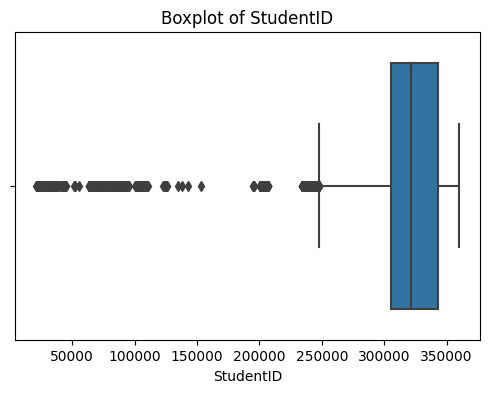

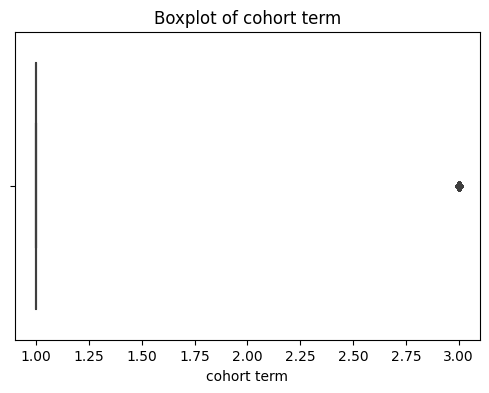

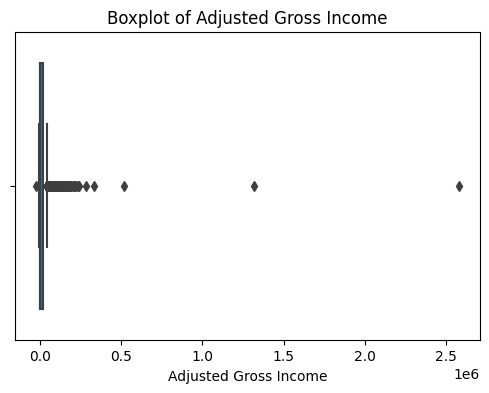

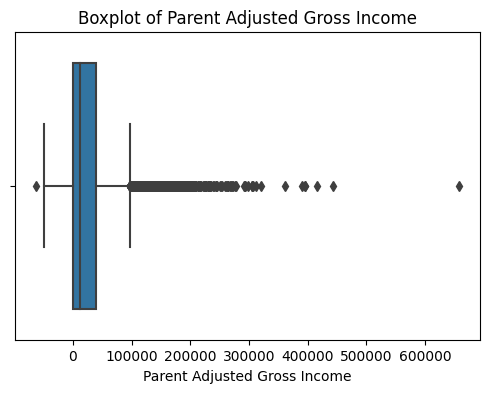

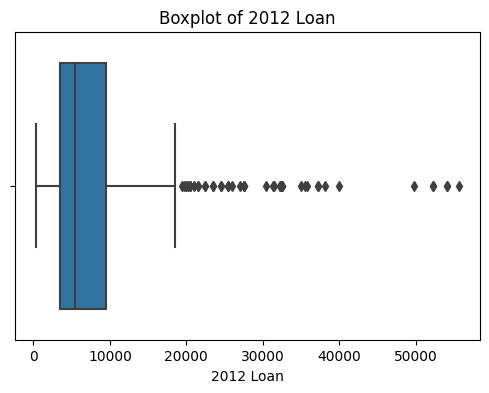

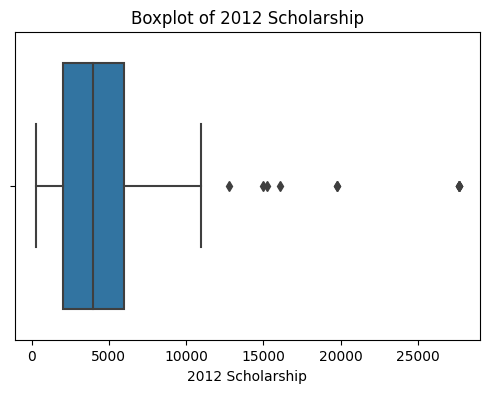

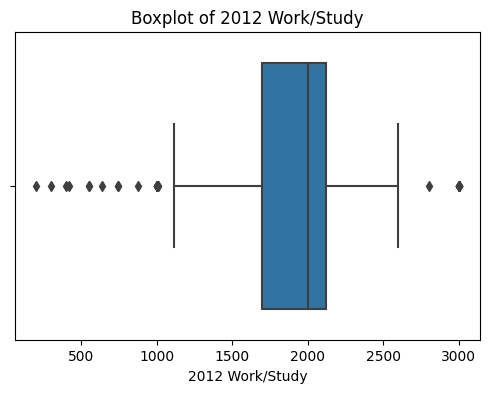

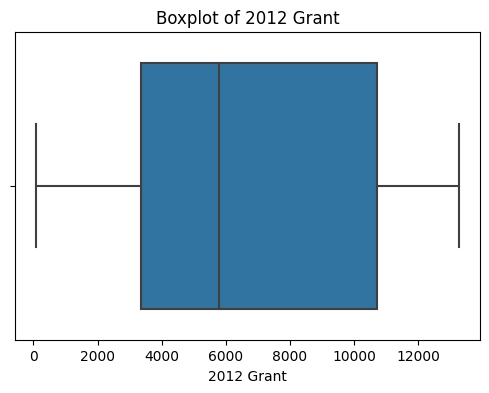

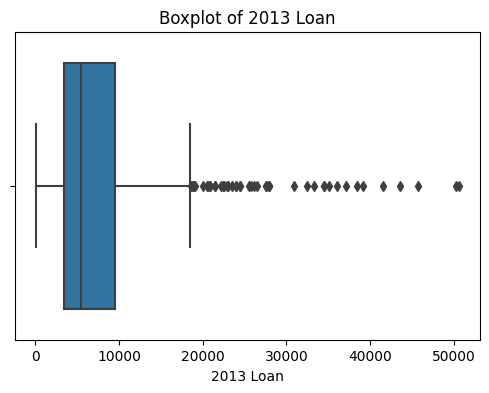

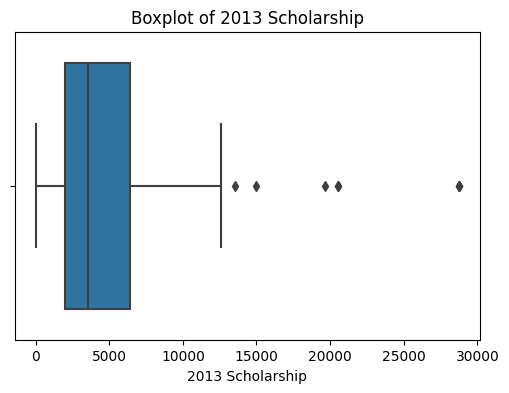

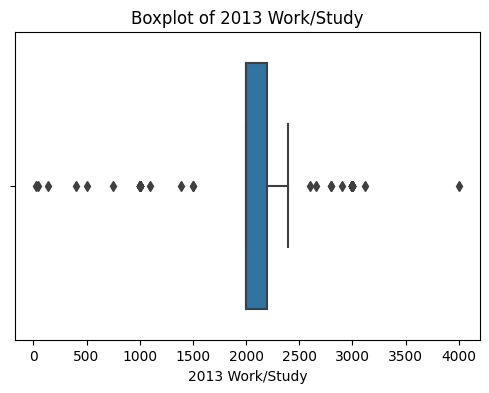

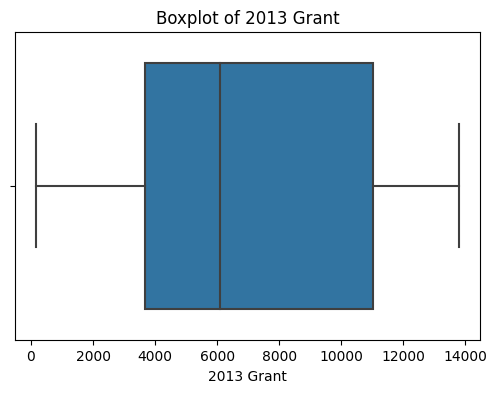

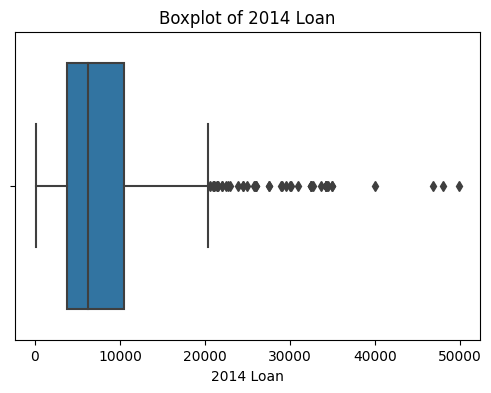

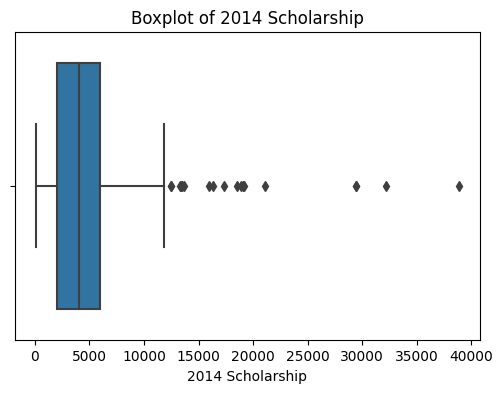

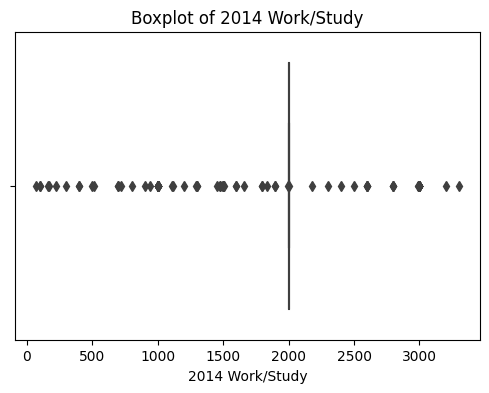

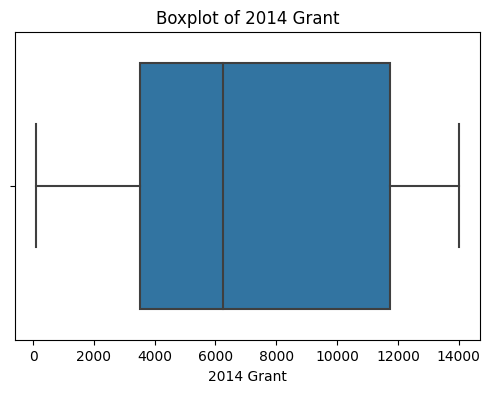

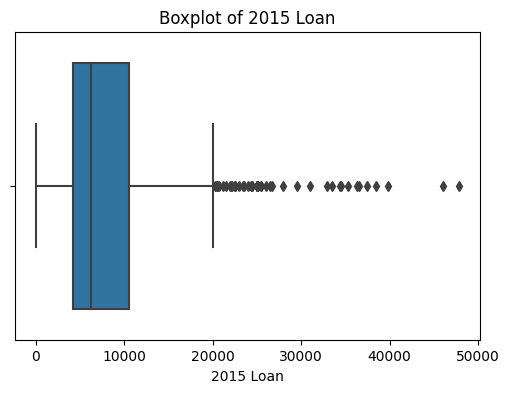

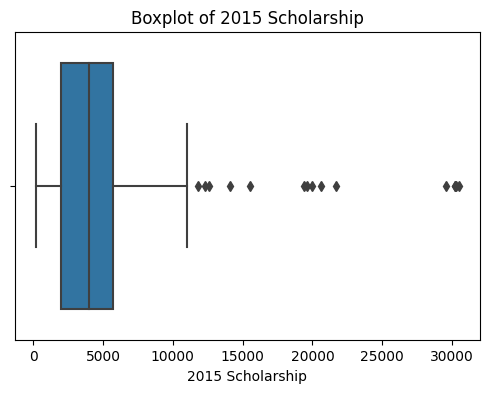

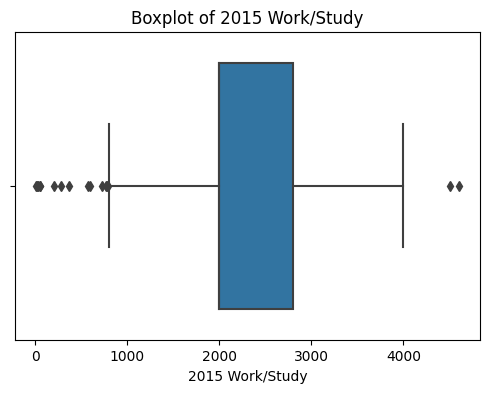

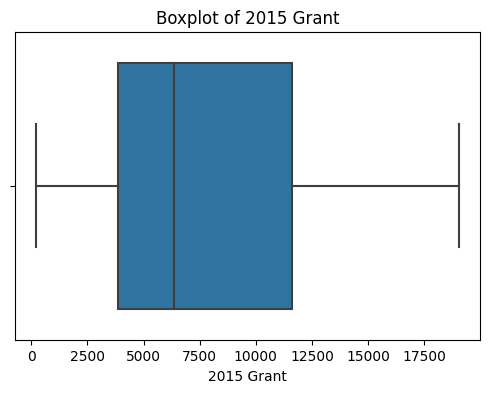

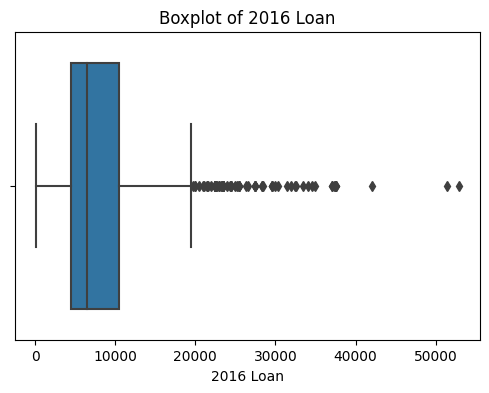

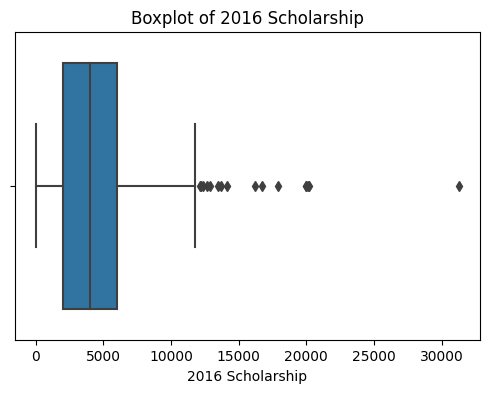

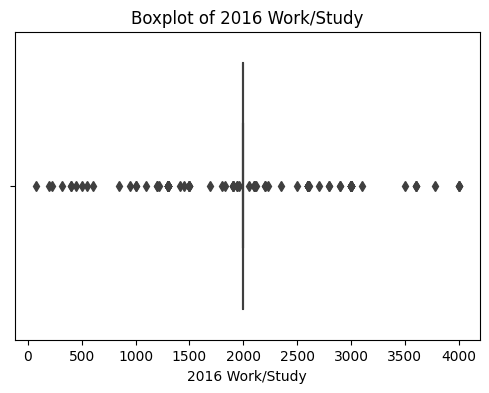

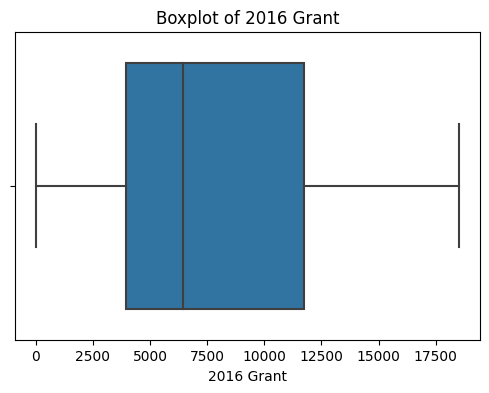

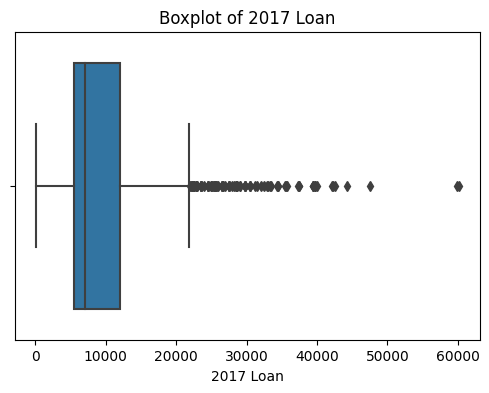

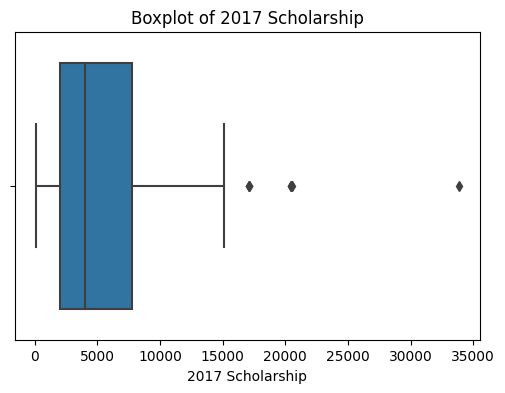

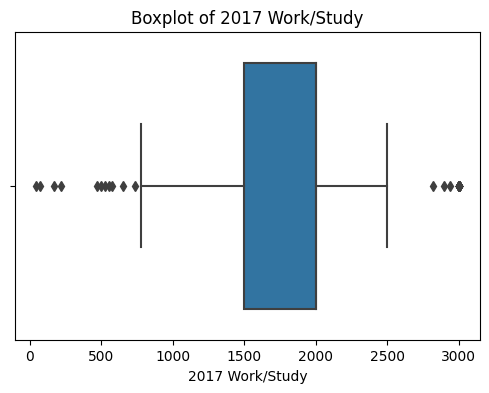

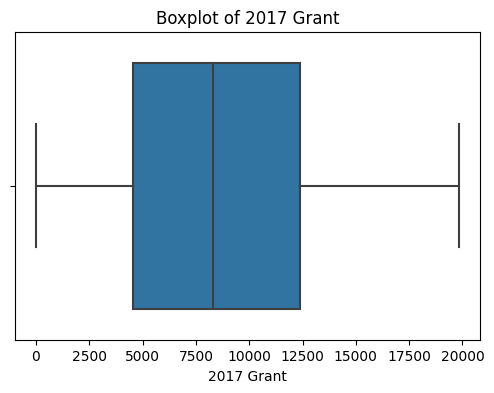

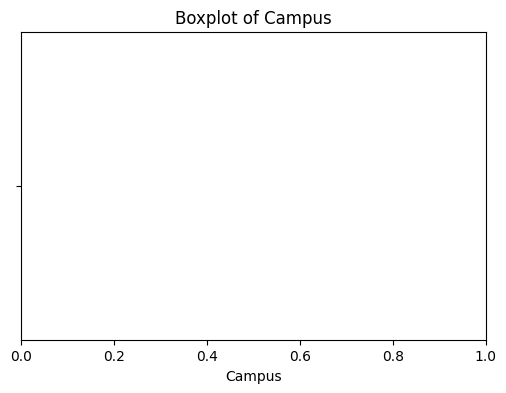

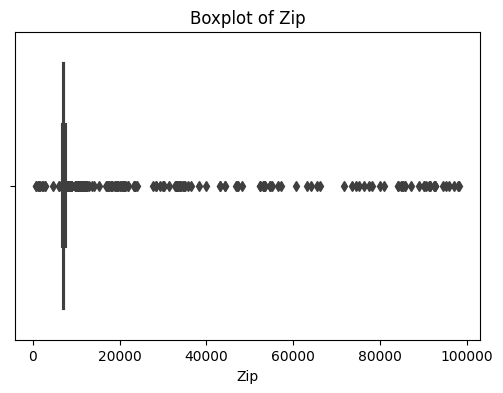

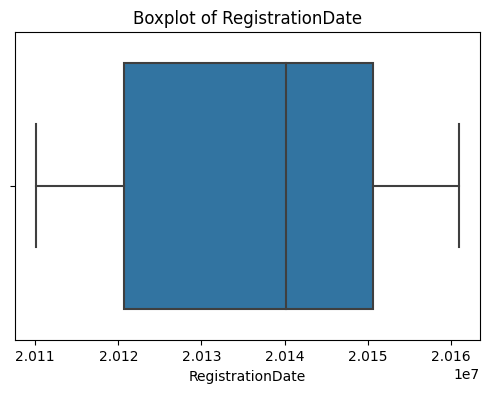

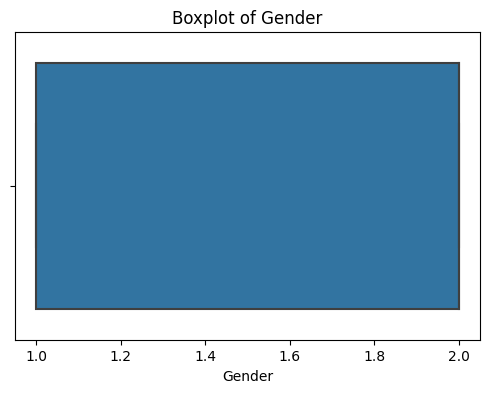

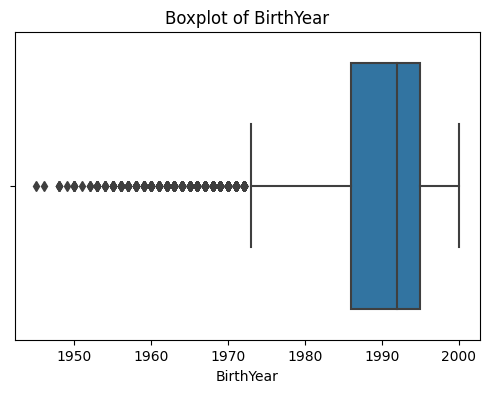

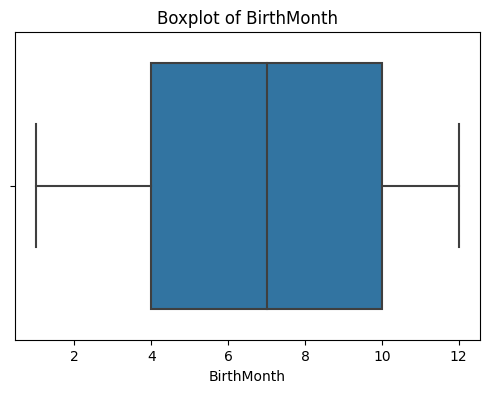

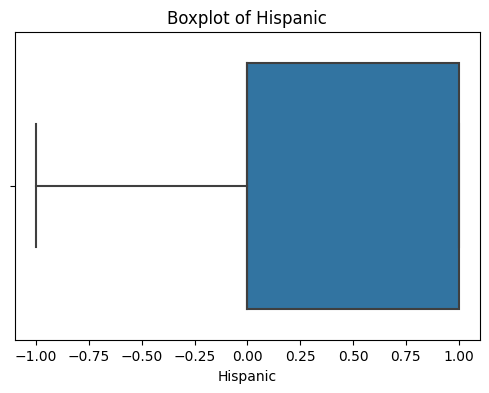

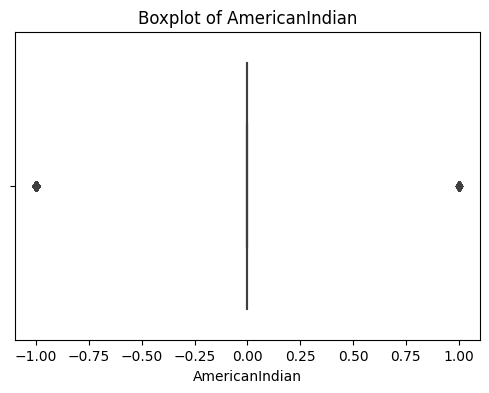

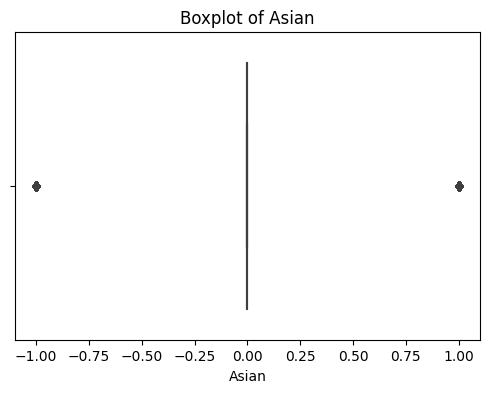

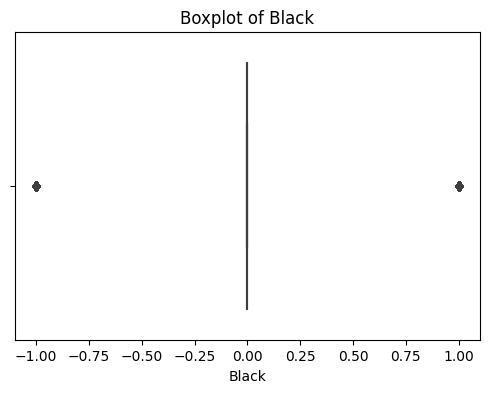

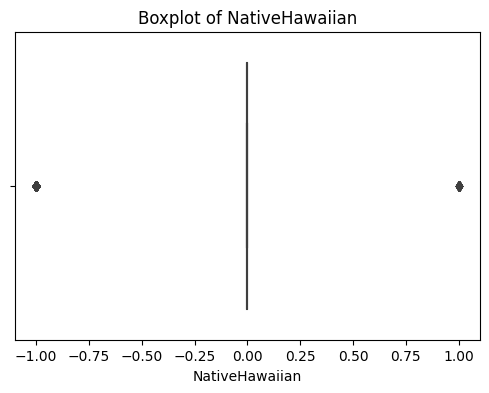

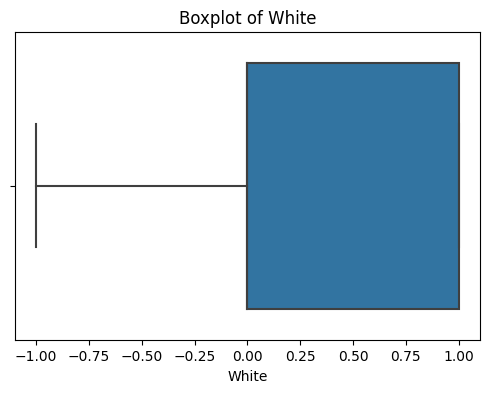

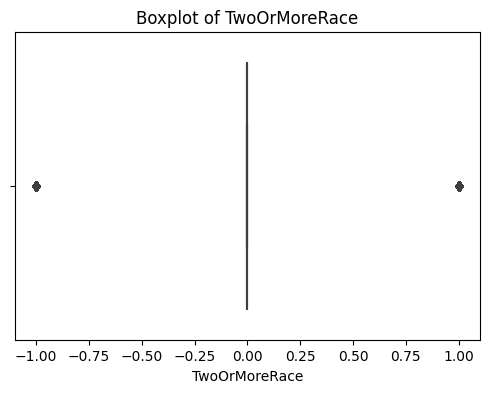

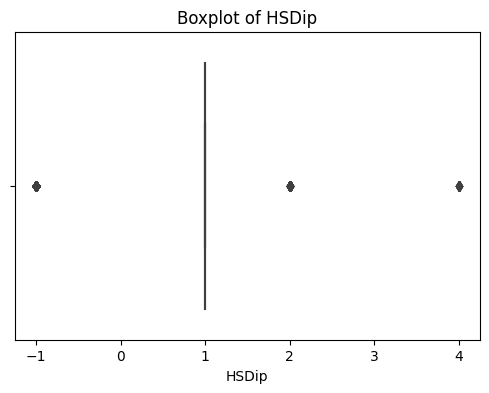

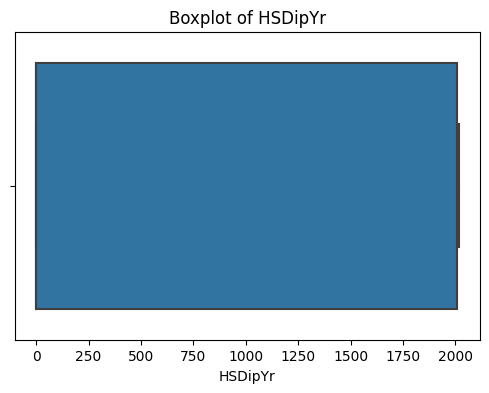

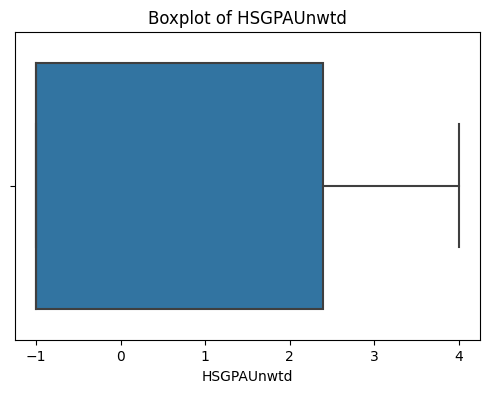

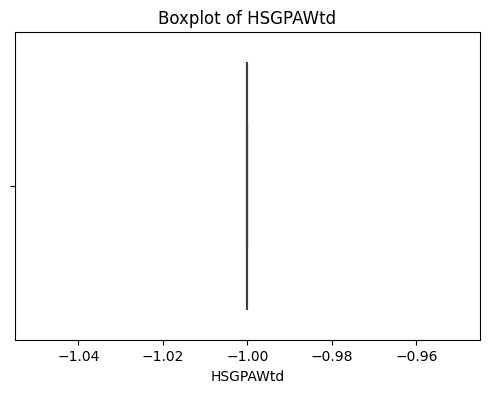

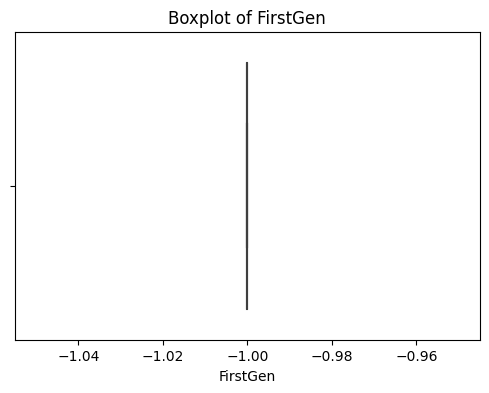

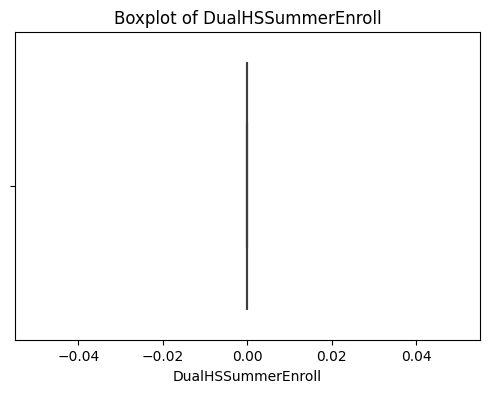

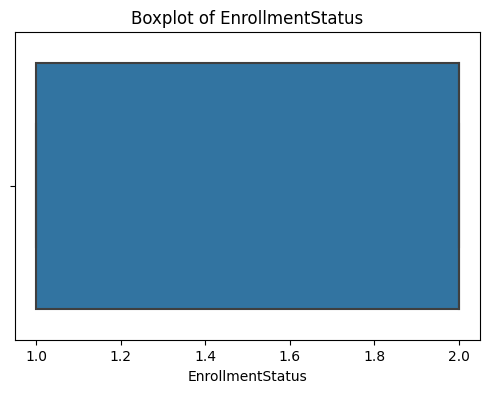

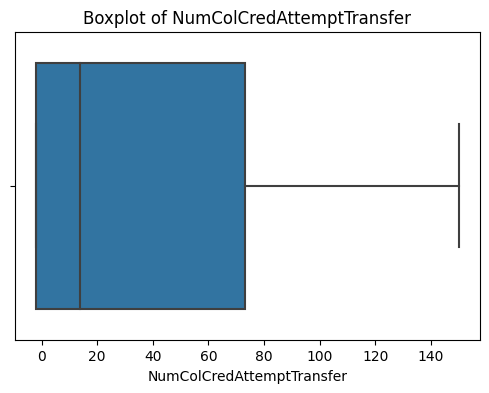

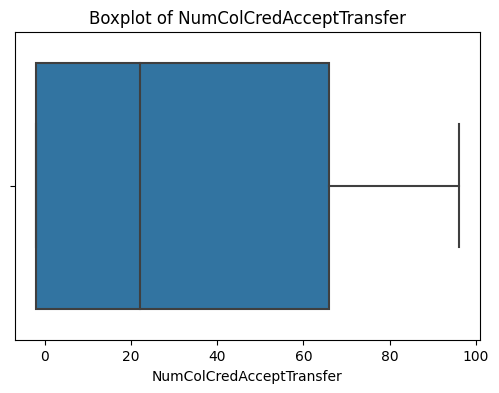

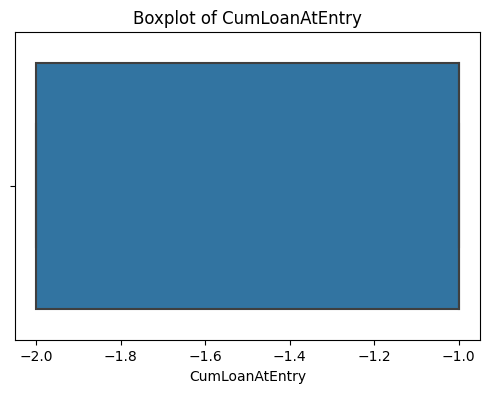

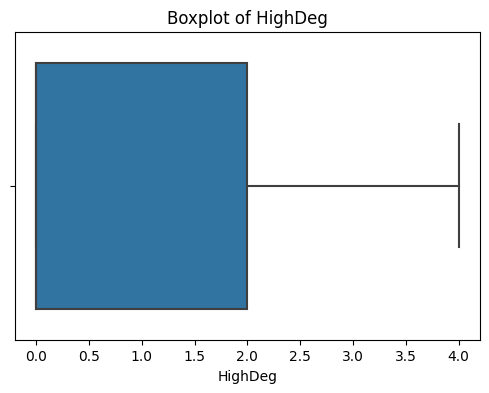

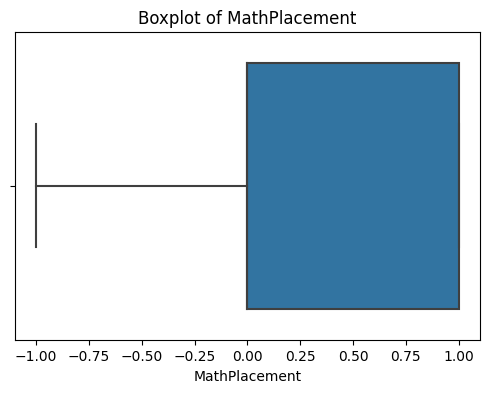

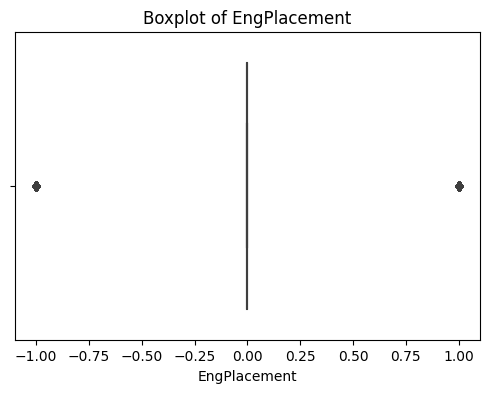

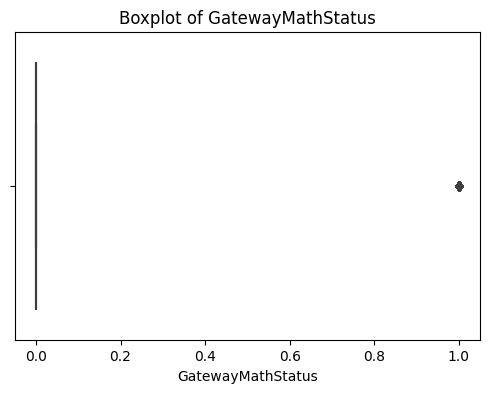

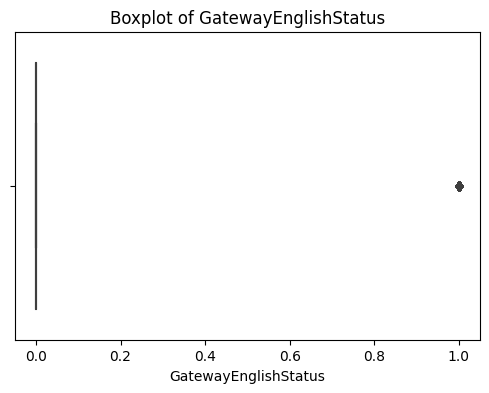

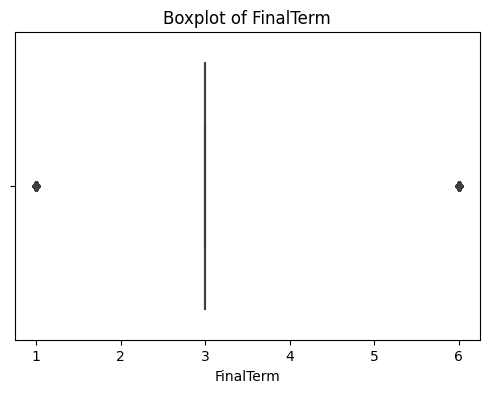

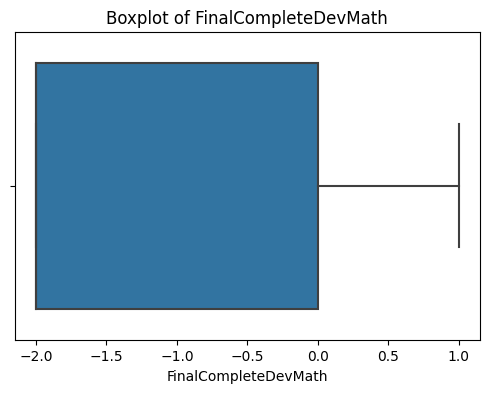

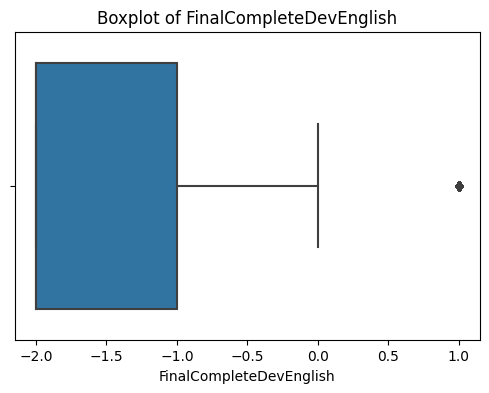

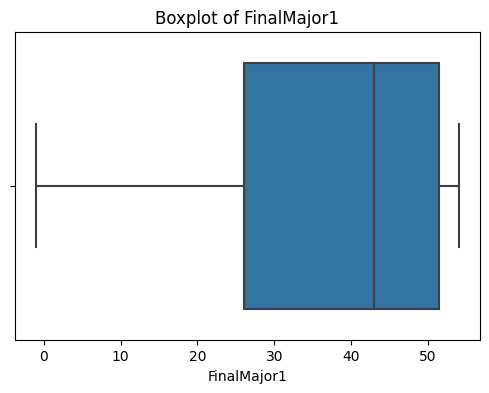

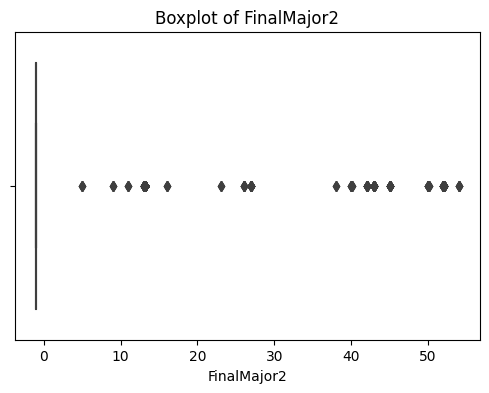

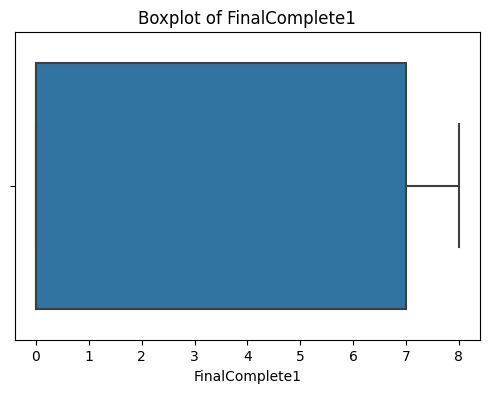

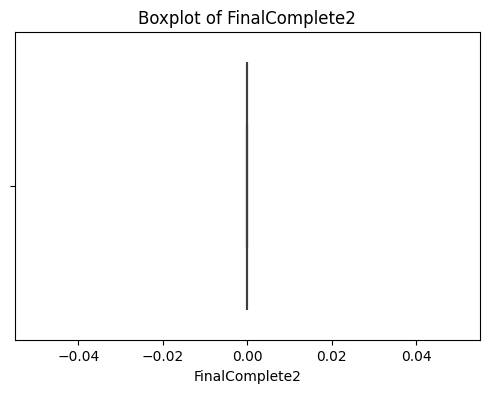

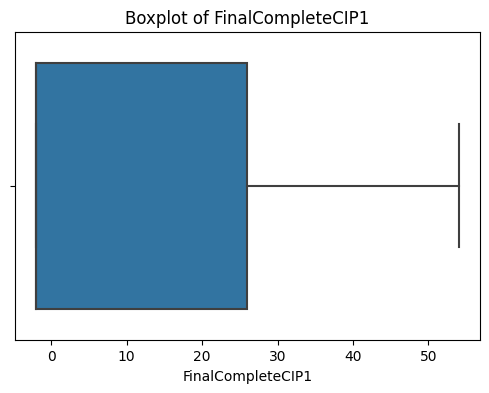

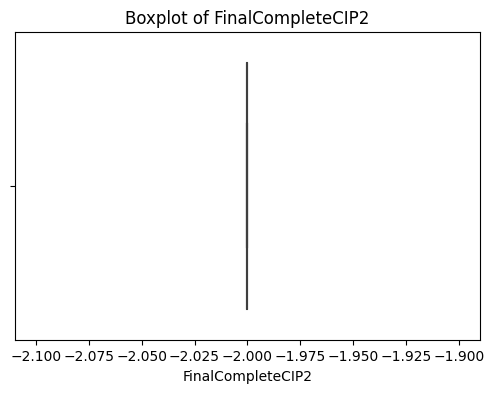

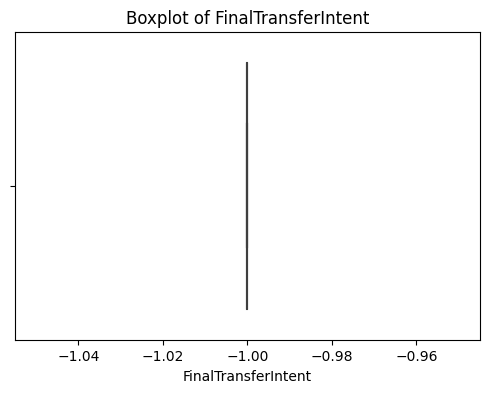

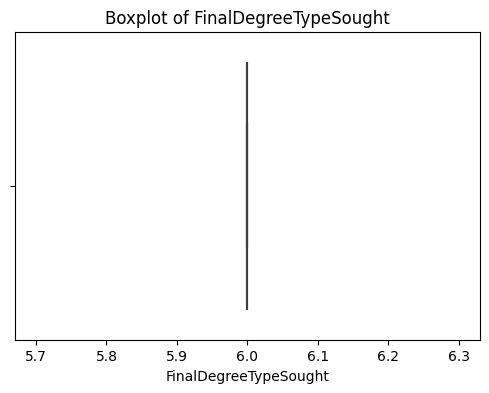

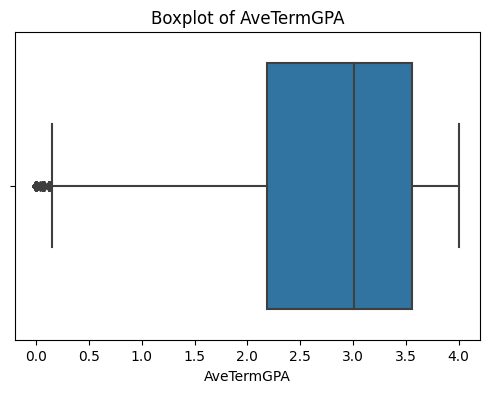

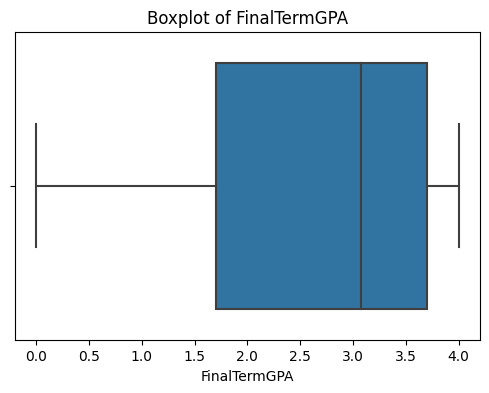

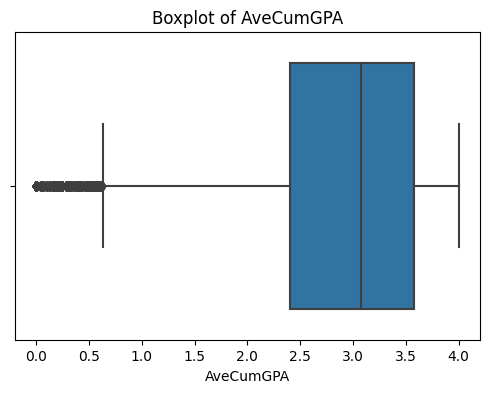

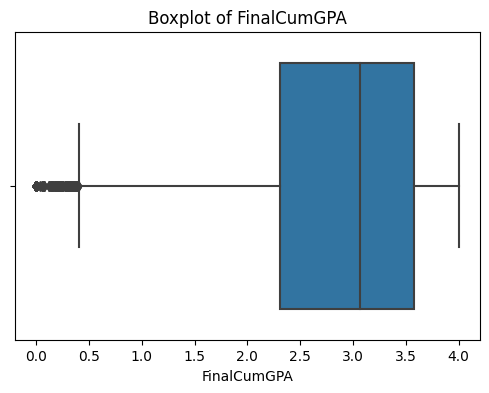

In [ ]:
for column in merged_data.columns:
    dtype = merged_data[column].dtype
    if dtype in ['int64', 'float64']:
       plt.figure(figsize=(6, 4))
       sns.boxplot(x=merged_data[column])
       plt.title(f"Boxplot of {column}")
       plt.xlabel(column)
       plt.show()

### 3.2.2 Categorical Veriables

As indicated ealier, the categorical variables would be considered to be dummy coded later.

The analysis of categorical variables through bar charts has provided additional insights:

1. Geographical Information: Columns like "City," "State," "Address1," and "Address2" all pertain to geographical information. Considering the existence of "Zip" as a student's location reference, retaining all these features may introduce redundancy. It might be unnecessary to keep all other geographical features.
2. High Cardinality in "City": he "City" column exhibits high cardinality, with numerous distinct values. Dummy coding such a column could result in the creation of too many additional columns, potentially impacting model performance and interpretability.
3. Irrelevant Columns: "Address1" and "Address2," detailing the exact address of students' residences, might have limited relevance in predicting dropout, especially considering the presence of other geographical information. These detailed address features may be candidates for exclusion from the modeling process, as their contribution to valuable insights might be minimal, and their retention could potentially introduce unnecessary complexity to the dataset without corresponding predictive benefits.

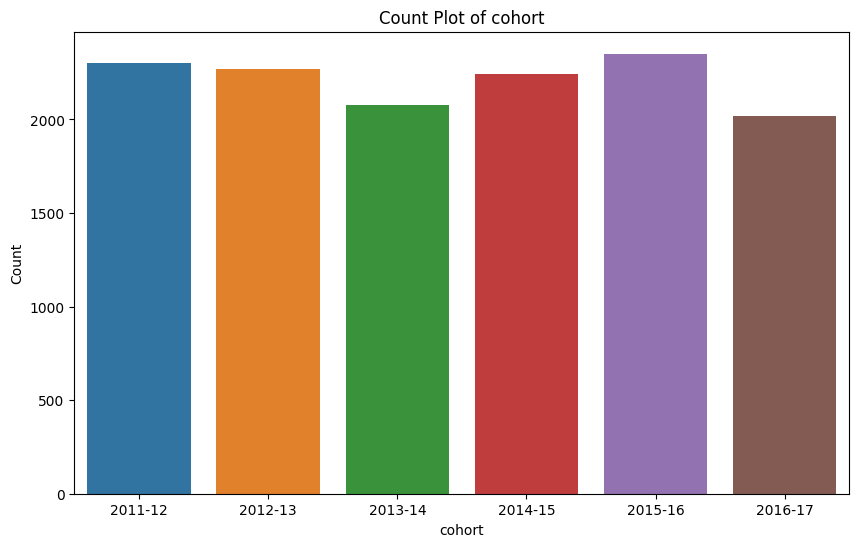

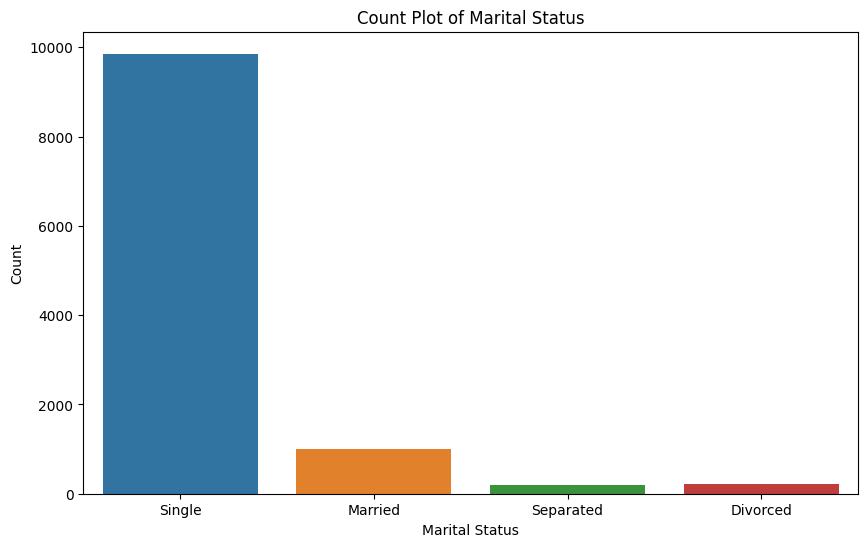

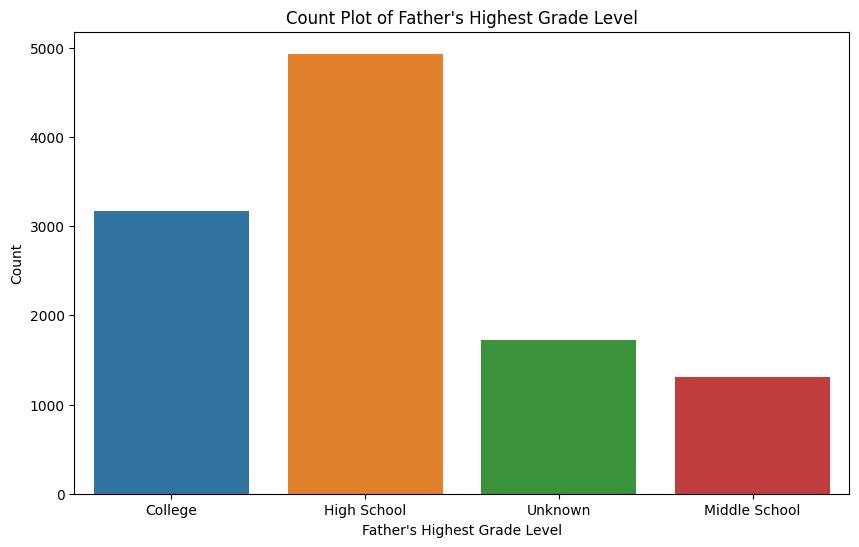

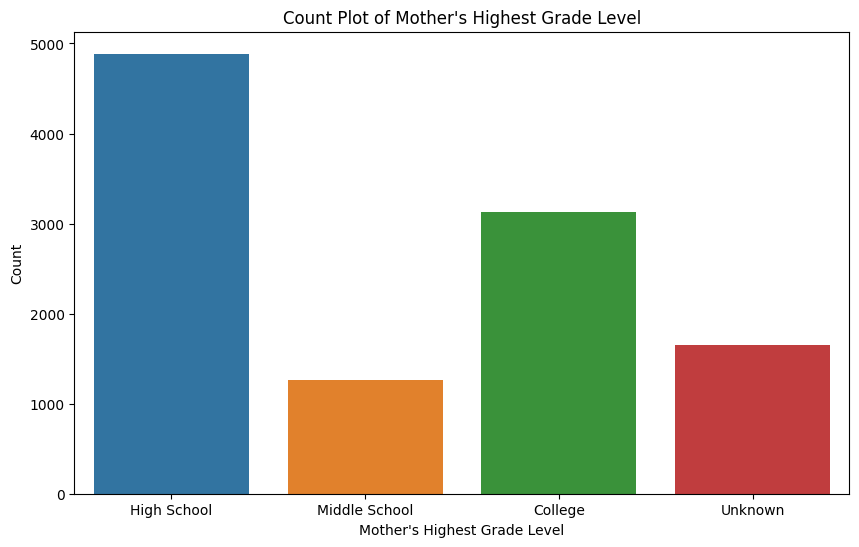

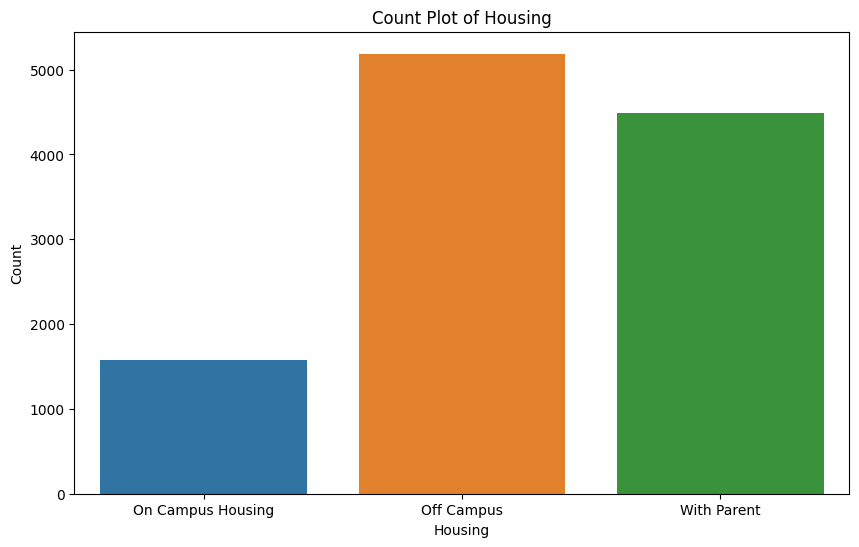

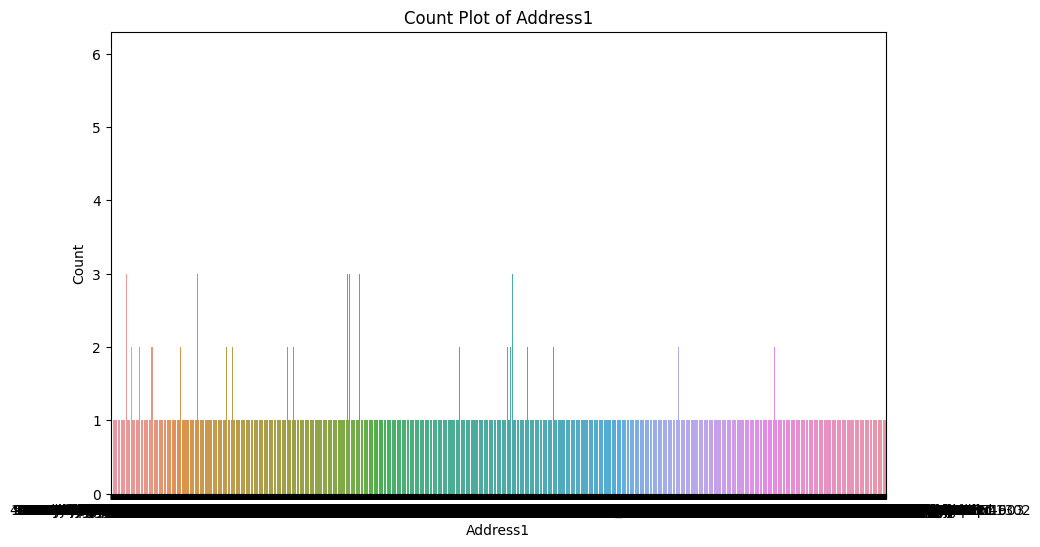

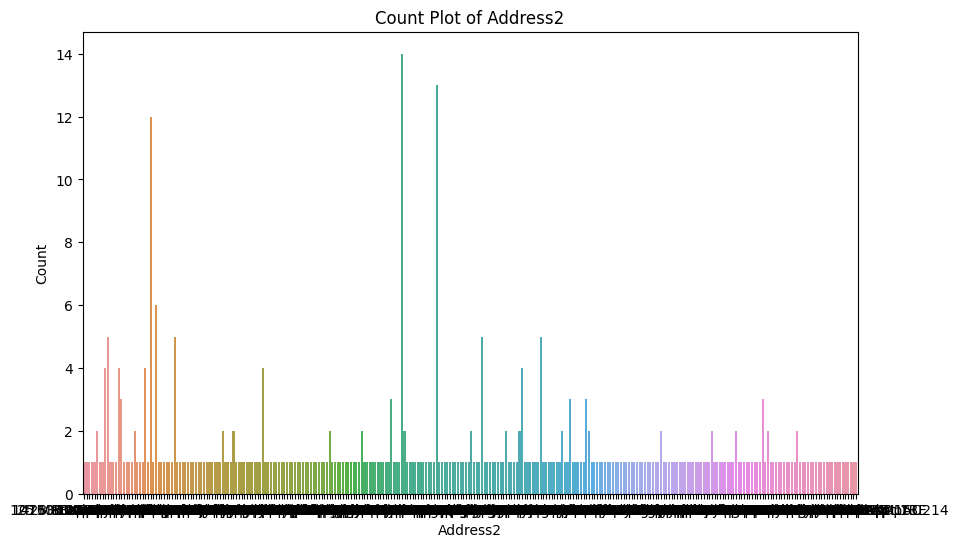

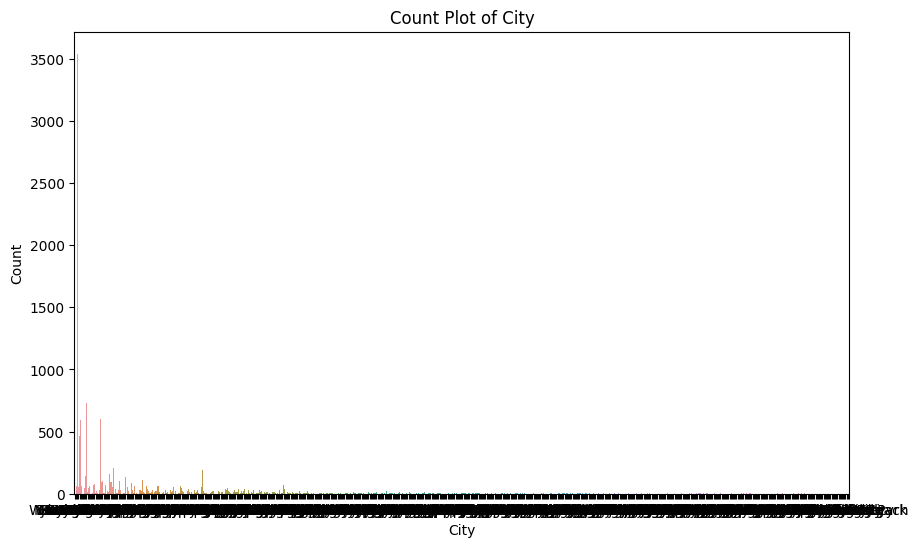

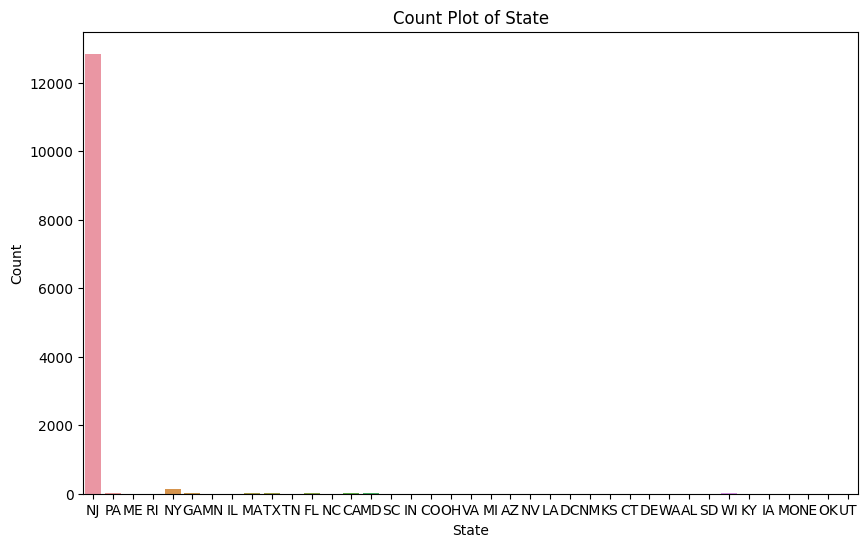

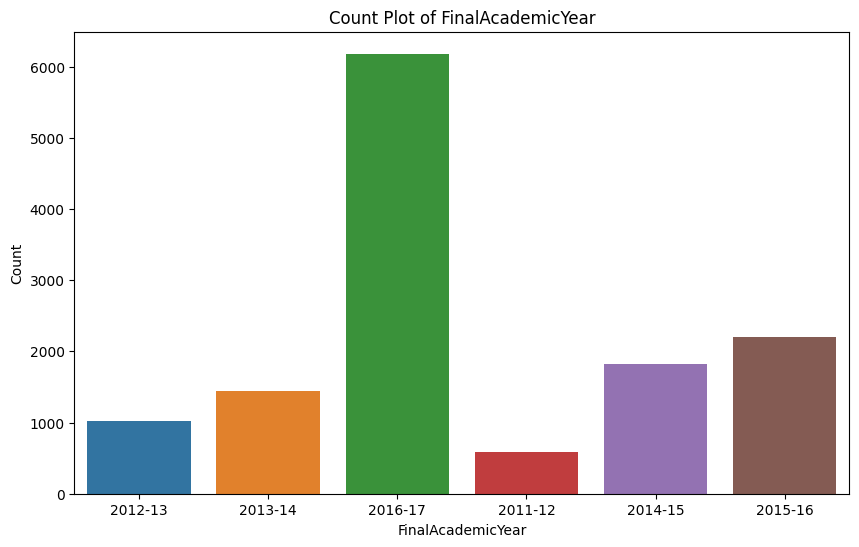

In [ ]:
for column in merged_data.columns:
    dtype = merged_data[column].dtype
    if dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=merged_data)
        plt.title(f"Count Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

## 3.3 Bivariate Analysis

Bivariate analysis explored the relationships between pairs of columns. This analysis unveiled insights into the associations and correlations between two specific features. Such insights prompted considerations for replacing existing correlated features with newly created features, enhancing the dataset's structure and potentially improving the effectiveness of subsequent analyses or modeling.

From the heat map, the following statement could be obtained:

1. Strong Correlations in Financial Support: The heat map revealed robust correlations among columns related to financial support. This aligned with earlier considerations to consolidate specific financial support items. For instance, there is a noteworthy positive correlation between "2012 Scholarship" and "2014 Scholarship," with a correlation coefficient of 0.93. This high correlation suggests that these two variables move together, and consolidating them into a single feature may simplify the dataset without sacrificing significant information.
2. Strong Correlation in Race Columns: There was robust correlation among students' responses to race-related features. For instance, there is a notable positive correlation between "Native Hawaiian" and "American Indian," with a correlation coefficient of 0.97. However, it is important to note that, without additional knowledge about students' racial backgrounds, it may not be reasonable to outright remove any specific race column. The high correlation implies a tendency for these race-related variables to move together, but the decision to retain or remove specific columns should be made with careful consideration of the broader context and objectives of the analysis.
3. High Correlation in Transfer History Columns: As expected, columns related to students' transfer history exhibit high correlation. For instance, the positive relationship between "EnrollmentStatus" and "NumColCredAttemptTransfer" indicates that transfer students attempted to transfer more credits. This aligns with common sense, as non-transfer students typically do not have any credits to transfer. However, since each column provides unique information, there is no strong evidence to drop any of them. Retaining these columns maintains a comprehensive representation of students' transfer-related details without sacrificing valuable insights.
4. Correlation Among GPA Items: Intriguingly, all GPA-related items exhibit correlations. Despite initial concerns about potential differences between "FinalTermGPA" and "AveTermGPA," they are found to be correlated with a coefficient of 0.87. However, it's crucial to note that these variables retain different meanings and offer distinct insights. As a result, retaining all GPA items may be more preferable, as each contributes unique information to the dataset. The correlations among these GPA variables highlight their interconnectedness, but their individual nuances make each valuable for a comprehensive analysis.



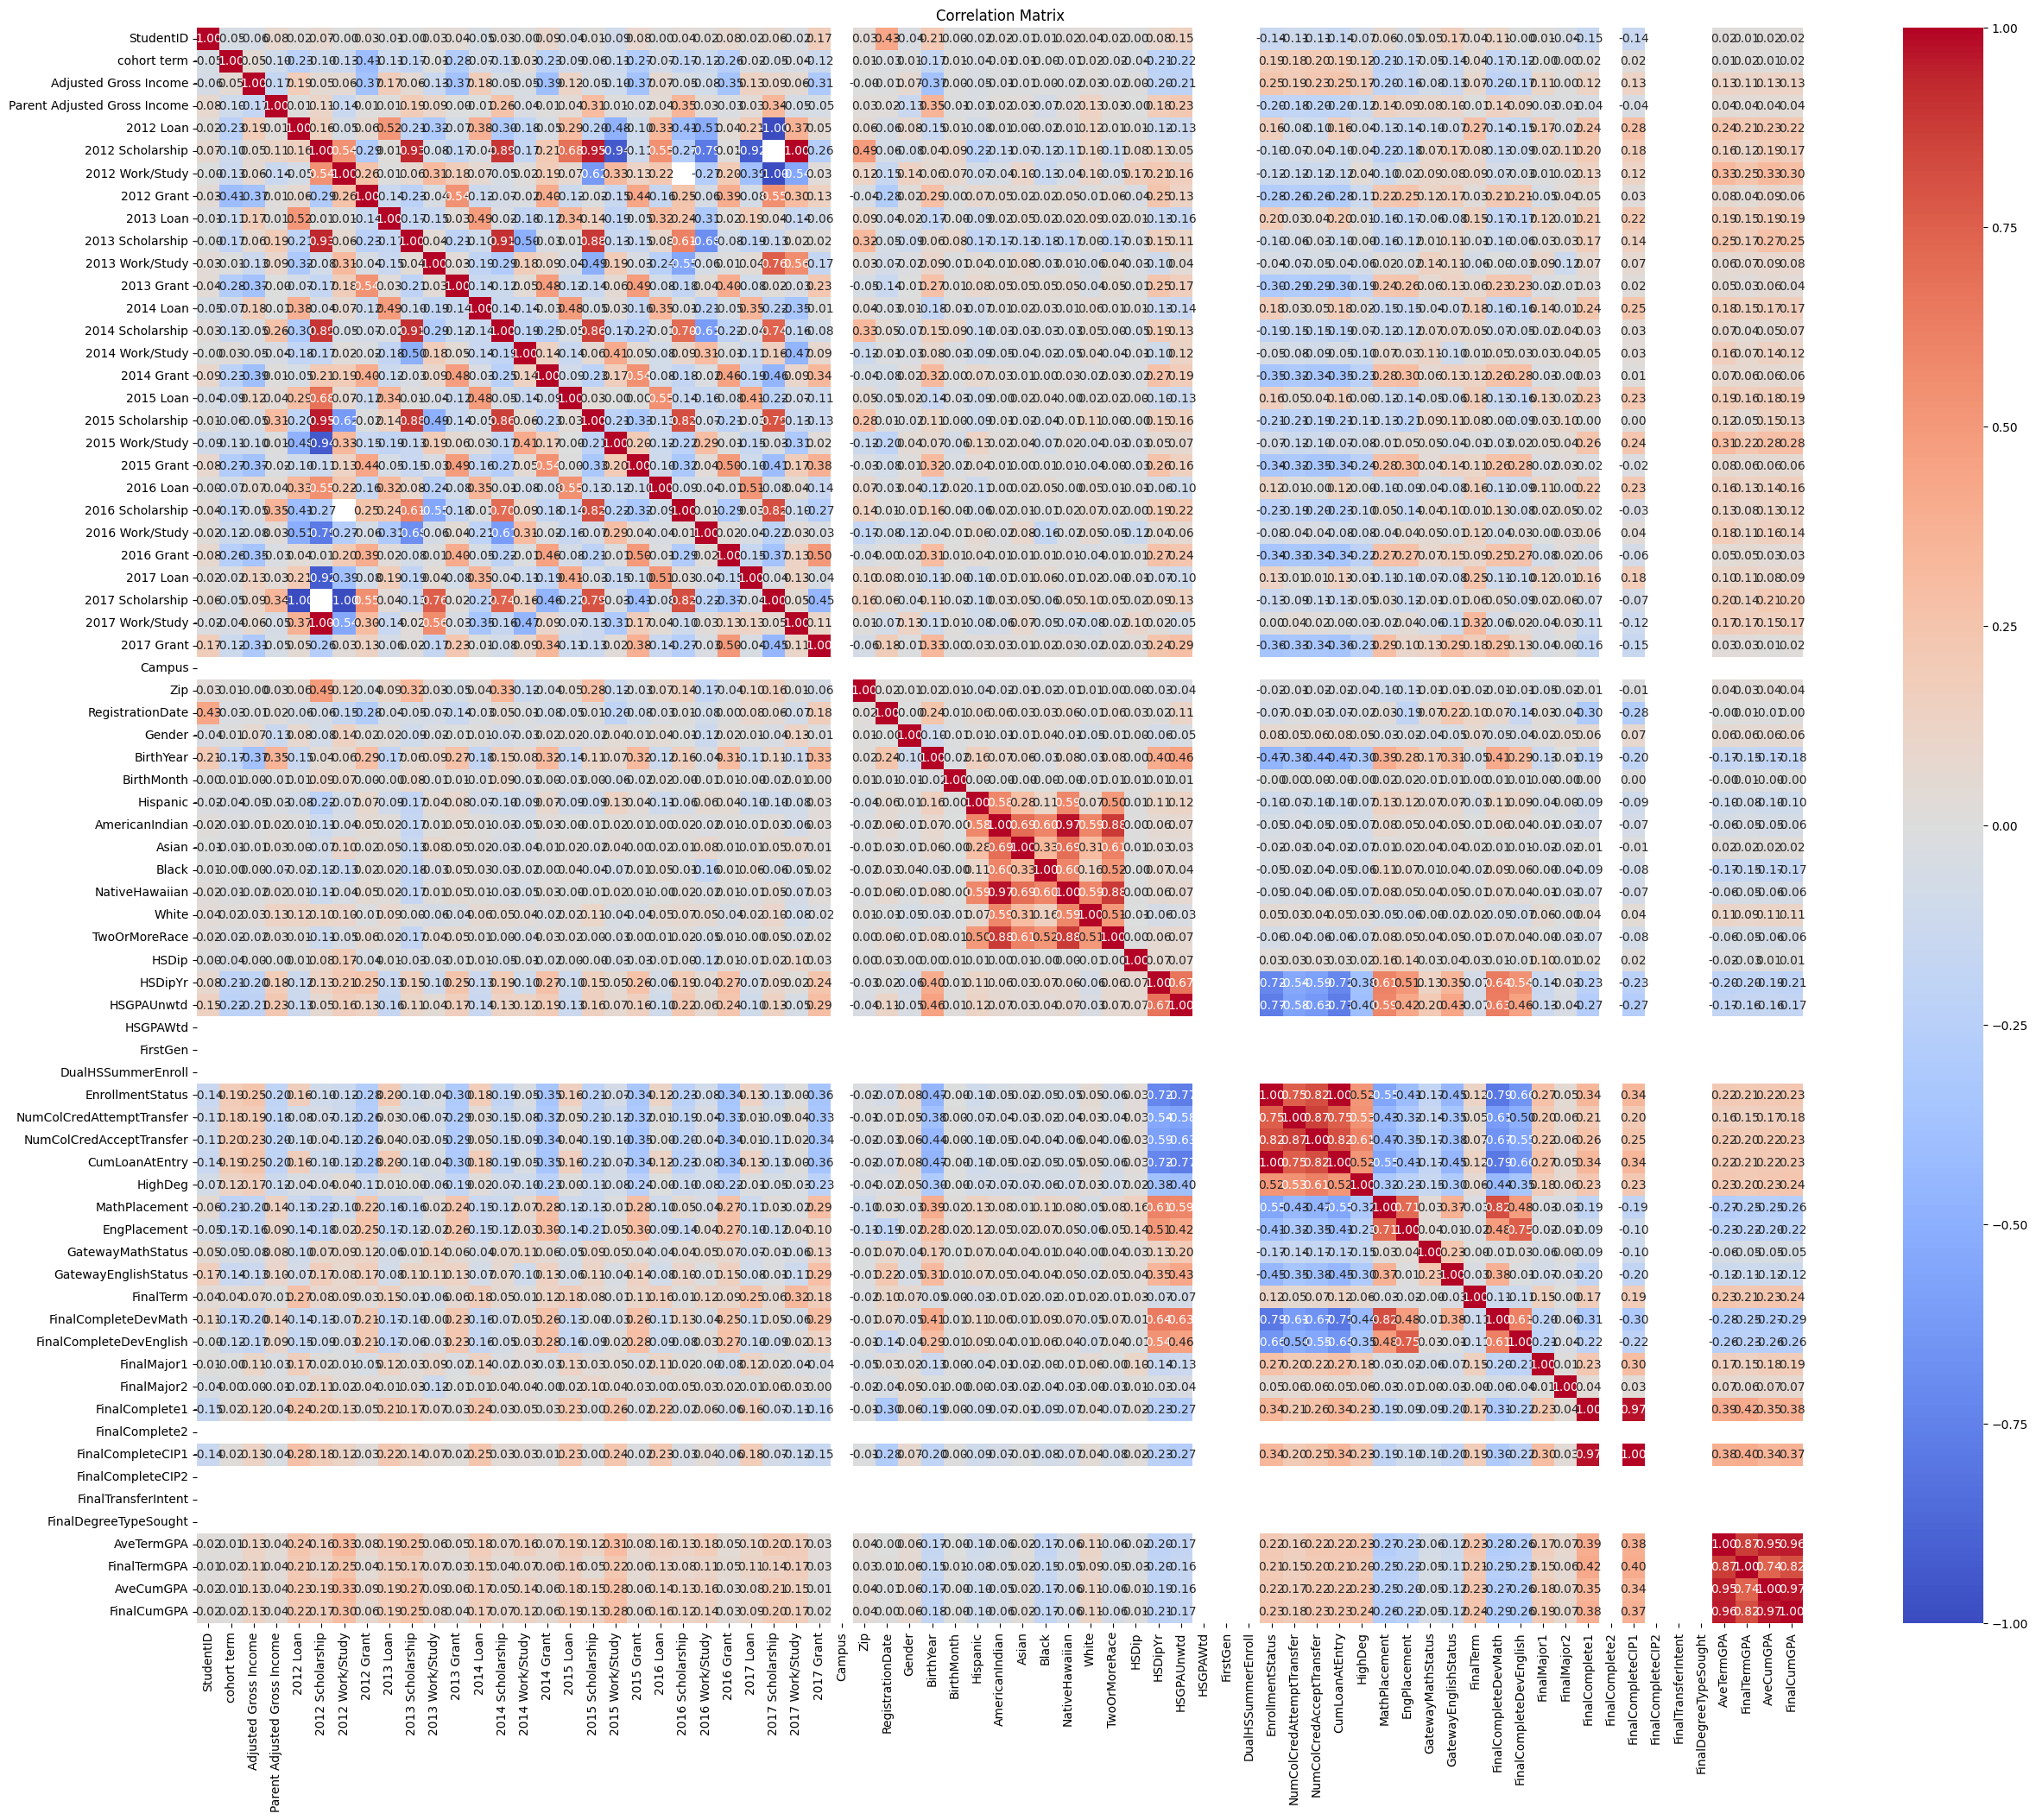

In [ ]:
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = merged_data[numerical_columns].corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

To sum up, the heatmap analysis revealed two key insights:

1. Correlation Challenges Due to Missing Values: Some correlations between columns were not displayed in the heatmap due to the presence of abundant missing values.
2. Limited Multicollinearity Concerns: In the context of this specific analysis, multicollinearity appears to be relatively rare, except for the significant instances mentioned earlier. This suggests that, overall, the dataset may not exhibit widespread issues of high correlation among independent variables, and the identified cases of multicollinearity are notable exceptions that can be partially resolved via feature engineering rather than a pervasive concern.

# 4. Data Preprocessing

Based on the previous analysis, the dataset was composed by features with following characteristics:
1. Features with unique values
2. Features with 100% missing values
3. Features that would not be useful for predictions
4. Features that are categorical (non-numerical) variables
5. Features that have high multilinearity with other features
6. Features with some missing values left empty
7. Features with some values labeled as -2 with a meaning of "not applicable"
8. Featurew with some values labeled as -1 with a meaning of "missing data"

Based on these differences, the dataset was preprocessed from five general aspects:
1. Data reduction
2. Feature engineering
3. Handling non-labled missing values
4. Handling values labled as "not applicable"
5. Handling labeled missing values

## 4.1 Data Reduction

Dropping columns with unique values, 100% missing values, and those deemed irrelevant is the first step of data preprocessing. This helped streamline the dataset by removing features that may not contribute meaningful information or could potentially introduce noise into the analysis.

###4.1.1 Dropping Columns with Unique Value

In [ ]:
for column in merged_data.columns:
    unique_values = merged_data[column].nunique()
    print(f"{column}: {unique_values} unique values")

StudentID: 13261 unique values
cohort: 6 unique values
cohort term: 2 unique values
Marital Status: 4 unique values
Adjusted Gross Income: 5670 unique values
Parent Adjusted Gross Income: 5920 unique values
Father's Highest Grade Level: 4 unique values
Mother's Highest Grade Level: 4 unique values
Housing: 3 unique values
2012 Loan: 219 unique values
2012 Scholarship: 57 unique values
2012 Work/Study: 39 unique values
2012 Grant: 450 unique values
2013 Loan: 339 unique values
2013 Scholarship: 90 unique values
2013 Work/Study: 24 unique values
2013 Grant: 629 unique values
2014 Loan: 510 unique values
2014 Scholarship: 109 unique values
2014 Work/Study: 44 unique values
2014 Grant: 856 unique values
2015 Loan: 566 unique values
2015 Scholarship: 141 unique values
2015 Work/Study: 71 unique values
2015 Grant: 917 unique values
2016 Loan: 574 unique values
2016 Scholarship: 159 unique values
2016 Work/Study: 46 unique values
2016 Grant: 1094 unique values
2017 Loan: 654 unique values
201

In [ ]:
columns_with_unique_value = merged_data.columns[merged_data.nunique() == 1]

In [ ]:
columns_with_unique_value

Index(['HSGPAWtd', 'FirstGen', 'DualHSSummerEnroll', 'FinalComplete2',
       'FinalCompleteCIP2', 'FinalTransferIntent', 'FinalDegreeTypeSought'],
      dtype='object')

In [ ]:
merged_data_cleaned = merged_data.drop(columns_with_unique_value, axis=1)

###4.1.2 Dropping Columns with All Missing Values

In [ ]:
columns_all_missing_values = merged_data_cleaned.columns[merged_data_cleaned.nunique() == 0]

In [ ]:
columns_all_missing_values

Index(['Campus'], dtype='object')

In [ ]:
merged_data_cleaned = merged_data_cleaned.drop(columns_all_missing_values, axis=1)

### 4.1.3 Dropping Irrelevent Columns


The geographical columns, excluding "State," were deemed irrelevant due to the presence of the "Zip" column. However, "State" was retained in consideration of its relatively small number of unique values, ensuring that dummy-coding would not lead to an unwieldy increase in the number of columns.

In [ ]:
irrelevent_columns = merged_data_cleaned[["Address1", "Address2", "City"]]

In [ ]:
merged_data_cleaned = merged_data_cleaned.drop(irrelevent_columns, axis=1)

In [ ]:
merged_data_cleaned.head()

,StudentID,cohort,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,...,FinalCompleteDevMath,FinalCompleteDevEnglish,FinalMajor1,FinalMajor2,FinalComplete1,FinalCompleteCIP1,AveTermGPA,FinalTermGPA,AveCumGPA,FinalCumGPA
0,297957,2011-12,1,Single,0.0,0.0,College,High School,On Campus Housing,3500.0,...,-2,-2,45.1101,-1.0,7,45.1101,2.61,4.00,2.28,2.38
1,302040,2011-12,1,Single,18096.0,0.0,High School,High School,Off Campus,12500.0,...,-2,-2,45.1101,-1.0,7,45.1101,3.22,2.90,3.17,3.10
2,234532,2011-12,1,Single,12383.0,0.0,High School,High School,Off Campus,NaN,...,-2,-2,43.0199,-1.0,8,43.0199,2.82,3.54,2.73,2.83
3,303486,2011-12,1,Married,59303.0,0.0,High School,Middle School,Off Campus,4750.0,...,-2,-2,27.0101,-1.0,7,27.0101,3.08,4.00,3.21,3.19
4,304316,2011-12,1,Single,25133.0,0.0,Unknown,High School,NaN,NaN,...,-2,-2,43.0199,-1.0,8,43.0199,3.18,2.88,3.20,3.11


In [ ]:
for column in merged_data_cleaned.columns:
    unique_values = merged_data_cleaned[column].nunique()
    print(f"{column}: {unique_values} unique values")

StudentID: 13261 unique values
cohort: 6 unique values
cohort term: 2 unique values
Marital Status: 4 unique values
Adjusted Gross Income: 5670 unique values
Parent Adjusted Gross Income: 5920 unique values
Father's Highest Grade Level: 4 unique values
Mother's Highest Grade Level: 4 unique values
Housing: 3 unique values
2012 Loan: 219 unique values
2012 Scholarship: 57 unique values
2012 Work/Study: 39 unique values
2012 Grant: 450 unique values
2013 Loan: 339 unique values
2013 Scholarship: 90 unique values
2013 Work/Study: 24 unique values
2013 Grant: 629 unique values
2014 Loan: 510 unique values
2014 Scholarship: 109 unique values
2014 Work/Study: 44 unique values
2014 Grant: 856 unique values
2015 Loan: 566 unique values
2015 Scholarship: 141 unique values
2015 Work/Study: 71 unique values
2015 Grant: 917 unique values
2016 Loan: 574 unique values
2016 Scholarship: 159 unique values
2016 Work/Study: 46 unique values
2016 Grant: 1094 unique values
2017 Loan: 654 unique values
201

##4.2 Feature Engineering

As the second step of data preprocessing in this project, feature engineering encompasses two main aspects: creating dummy variables for the categorical features and generating new features related to financial support. This process aims to transform non-numeric categorical variables into a format suitable for machine learning algorithms and derive a consolidated financial support feature for a more comprehensive representation of that aspect in the dataset.

###4.2.1 Getting Dummies for Certain Features

In [ ]:
# Getting dummies for the columns whose type is object
Cohort_dummies = pd.get_dummies(merged_data["cohort"], prefix = "cohort")
State_dummies = pd.get_dummies(merged_data["State"], prefix = "State")
FatherHighestGradeLevel_dummies = pd.get_dummies(merged_data["Father's Highest Grade Level"], prefix = "Father's Highest Grade Level")
MotherHighestGradeLevel_dummies = pd.get_dummies(merged_data["Mother's Highest Grade Level"], prefix = "Mother's Highest Grade Level")
Housing_dummies = pd.get_dummies(merged_data["Housing"], prefix = "Housing")
MaritalStatus_dummies = pd.get_dummies(merged_data["Marital Status"], prefix = "Marital Status")
FinalAcademicYear_dummies = pd.get_dummies(merged_data["FinalAcademicYear"], prefix = "FinalAcademicYear")

In [ ]:
# Concating dummies columns to the merged_data
merged_data_cleaned = pd.concat([merged_data_cleaned, Cohort_dummies, State_dummies, FatherHighestGradeLevel_dummies, MotherHighestGradeLevel_dummies, Housing_dummies, FinalAcademicYear_dummies], axis=1)

In [ ]:
# Dropping original columns from the merged_data
merged_data_cleaned = merged_data_cleaned.drop(columns=["cohort", 'Marital Status', "Father's Highest Grade Level",
                                                      "Mother's Highest Grade Level", 'Housing',
                                                      "FinalAcademicYear", "State"])

In [ ]:
merged_data_cleaned

,StudentID,cohort term,Adjusted Gross Income,Parent Adjusted Gross Income,2012 Loan,2012 Scholarship,2012 Work/Study,2012 Grant,2013 Loan,2013 Scholarship,...,Mother's Highest Grade Level_Unknown,Housing_Off Campus,Housing_On Campus Housing,Housing_With Parent,FinalAcademicYear_2011-12,FinalAcademicYear_2012-13,FinalAcademicYear_2013-14,FinalAcademicYear_2014-15,FinalAcademicYear_2015-16,FinalAcademicYear_2016-17
0,297957,1,0.0,0.0,3500.0,NaN,NaN,10714.0,5500.0,NaN,...,0,0,1,0,0,1,0,0,0,0
1,302040,1,18096.0,0.0,12500.0,NaN,NaN,3500.0,6250.0,NaN,...,0,1,0,0,0,1,0,0,0,0
2,234532,1,12383.0,0.0,NaN,NaN,NaN,7432.0,5500.0,NaN,...,0,1,0,0,0,0,1,0,0,0
3,303486,1,59303.0,0.0,4750.0,NaN,NaN,850.0,2750.0,NaN,...,0,1,0,0,0,0,0,0,0,1
4,304316,1,25133.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13256,325536,1,0.0,102439.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
13257,342013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
13258,359065,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
13259,359327,1,0.0,25679.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,0,0,0,1


###4.2.2 Creating New Features

For the features related to financial aid, specifically Loan, Scholarship, Work/Study, and Grant spanning the years 2012-2017, a feature engineering step was undertaken. Four new features were created:  "TotalLoan", "TotalScholarship", "TotalWork/Study", and "TotalGrant". These new features represent the total amounts for each respective financial aid category across the specified years. This consolidation simplifies the representation of financial support in the dataset, facilitating a more straightforward interpretation of the cumulative aid received by students over the designated time period.

In [ ]:
Loan_columns = merged_data_cleaned.filter(like=' Loan').columns
Scholarship_columns = merged_data_cleaned.filter(like=' Scholarship').columns
Work_study_columns = merged_data_cleaned.filter(like=' Work/Study').columns
Grant_columns = merged_data_cleaned.filter(like=' Grant').columns

# Creating new colomns for financial aid types
merged_data_cleaned["TotalLoan"] = merged_data_cleaned[Loan_columns].sum(axis=1)
merged_data_cleaned["TotalScholarship"] = merged_data_cleaned[Scholarship_columns].sum(axis=1)
merged_data_cleaned["TotalWork/Study"] = merged_data_cleaned[Work_study_columns].sum(axis=1)
merged_data_cleaned["TotalGrant"] = merged_data_cleaned[Grant_columns].sum(axis=1)


In [ ]:
# Dropping original columns from the merged_data
merged_data_cleaned = merged_data_cleaned.drop(columns=['2012 Loan', '2012 Scholarship', '2012 Work/Study', '2012 Grant',
                                                 '2013 Loan', '2013 Scholarship', '2013 Work/Study', '2013 Grant',
                                                 '2014 Loan', '2014 Scholarship', '2014 Work/Study', '2014 Grant',
                                                 '2015 Loan', '2015 Scholarship', '2015 Work/Study', '2015 Grant',
                                                 '2016 Loan', '2016 Scholarship', '2016 Work/Study', '2016 Grant',
                                                 '2017 Loan', '2017 Scholarship', '2017 Work/Study', '2017 Grant'])

## 4.3 Handle Non-Labeled Missing Values

In the process of handling non-labeled missing values (NaN or null values), the following steps were taken: identifying dolumns containing non-labeled missing values were identified within the dataset, imputing those missing values using various techiniques, and assessing the imputation outcome.


###4.3.1 Locating Non-Labled Missing Values

In [ ]:
# Calculating the numbers of missing values for each column in merged_data_cleaned
missing_values = merged_data_cleaned.isna().sum()

In [ ]:
# Getting the columns that contain missing values
missing_values = missing_values [missing_values > 0]

As the following output shows, four columns were identified as containing missing values.

In [ ]:
missing_values

Adjusted Gross Income           1992
Parent Adjusted Gross Income    1992
Zip                              134
BirthYear                          1
dtype: int64

###4.3.2 Imputing Missing Values

Given the presence of many outliers in the columns "Adjusted Gross Income" and "Parent Adjusted Gross Income," as shown by EDA, the median was chosen as an imputation strategy for filling in the missing values.

In [ ]:
# Imputing missing values for columnns "Adjusted Gross Income" and "Parent Adjusted Gross Income"
merged_data_cleaned['Adjusted Gross Income'] = merged_data_cleaned['Adjusted Gross Income'].fillna(merged_data_cleaned['Adjusted Gross Income'].median())
merged_data_cleaned['Parent Adjusted Gross Income'] = merged_data_cleaned['Parent Adjusted Gross Income'].fillna(merged_data_cleaned['Parent Adjusted Gross Income'].median())


For the column "Zip," a common imputation strategy was employed, with the mode chosen as the imputed value. Using the mode, the missing values were filled with the most frequent zip code appeared in the dataset.

In [ ]:
# Imputing missing values for column "Zip"
merged_data_cleaned['Zip'] = merged_data_cleaned['Zip'].fillna(merged_data_cleaned['Zip'].mode()[0])


For the column "BirthYear," a cohort-based imputation strategy was employed. Recognizing that students within the same cohort typically share similar birth years, the most frequent birth year within each cohort was used to impute missing values.

In [ ]:
# Imputing missing values for column "BirthYear"
merged_data_cleaned['BirthYear'] = merged_data.groupby('cohort')['BirthYear'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

###4.3.3 Checking Imputations

In [ ]:
# Calculating the numbers of missing values for each column in merged_data_cleaned after imputation
missing_values_after_imutation = merged_data_cleaned.isna().sum()

In [ ]:
# Getting the columns that contain missing values afrer imputation
missing_values_after_imutation = missing_values_after_imutation[missing_values_after_imutation > 0]

Following the imputation process, the dataset is now free of non-labeled missing values. However, it's important to note that there are still missing values present in the dataset, but they are specifically labeled as -1.

In [ ]:
missing_values_after_imutation

Series([], dtype: int64)

##4.4 Handle Data Labeled as "Not Applicable"

In the process of handling data labeled as "not applicable" (coded as "-2"), it was determined that this value signifies instances falling into one of three categories, as outlined in the data dictionary:

1. Non-Transfer Students: For students who are not transfer students, columns related to transfer history are marked as -2.
2. No Referral for Developmental Courses: Students who were not referred to take developmental courses have their completion status of those courses entered as -2.
3. No Award Received: Students who did not receive any award have the award code CIP entered as -2.

###4.4.1 Locating Data Labeled as "Not Applicable"

As the following output indicates, there are six columns containing the value -2. Three of them are related to transfer history, two are associated to referral to developmental courses, and one pertains to award received.

In [ ]:
columns_with_neg_2 = merged_data_cleaned.columns[merged_data_cleaned.isin([-2]).any()]
columns_with_neg_2_count = merged_data_cleaned[columns_with_neg_2].eq(-2).sum()
columns_with_neg_2_count

NumColCredAttemptTransfer    5452
NumColCredAcceptTransfer     5452
CumLoanAtEntry               5452
FinalCompleteDevMath         8412
FinalCompleteDevEnglish      9537
FinalCompleteCIP1            9529
dtype: int64

###4.4.2 Imputing Data Labeled as "Not Applicable"

Replacing the value -2 with 0 for columns related to transfer history, such as transfer credits and loan at entry, is a logical and contextually appropriate imputation strategy. This decision aligns with the understanding that non-transfer students, who are represented by the -2 value in these columns, would not have any transfer credits or loans associated with their entry.

In [ ]:
# Columns relating to transfer status
transfer_columns = ["NumColCredAttemptTransfer", "CumLoanAtEntry", "NumColCredAcceptTransfer"]
merged_data_cleaned[transfer_columns] = merged_data_cleaned[transfer_columns].replace(-2, 0)

 Recognizing that it doesn't make sense to attribute completion status to students who were not referred, the introduction of a binary indicator for referral status provides a more nuanced representation of this aspect in the dataset.

In [ ]:
# Columns relating to developmental courses
merged_data_cleaned["Refered_DevMath"] = merged_data_cleaned['FinalCompleteDevMath'].apply(lambda x: 0 if x == -2 else 1)
merged_data_cleaned["Refered_DevEnglish"] = merged_data_cleaned['FinalCompleteDevEnglish'].apply(lambda x: 0 if x == -2 else 1)

Similar to the approach taken with the referral to developmental courses, introducing a new column for award receipt status acknowledges the distinct nature of this information.

In [ ]:
# FinalCompleteCIP1
merged_data_cleaned["Awarded_CPI"] = merged_data_cleaned['FinalCompleteCIP1'].apply(lambda x: 0 if x == -2 else 1)

## 4.5 Handle Labeled Missing Values

In addressing labeled missing values marked as -1 in the dataset, all columns containing the value -1 were identified and then the missing values were imputed using various methods.

### 4.5.1 Locating Labeled Missing Values

In [ ]:
# Replacing all -1 with NaN
merged_data_cleaned = merged_data_cleaned.replace (-1, np.nan)

In [ ]:
# Counting labeled_missing_values
labeled_missing_values = merged_data_cleaned.isna().sum()
labeled_missing_values = labeled_missing_values [labeled_missing_values > 0]

The output displays columns containing the value -1, which can be classified into five categories: race-related columns, columns with continuous values, columns with discrete values, columns with a notable number of missing values, columns coexisting with many -2 values, and columns related to majors. This categorization offers insights into the diverse contexts where -1 is utilized, guiding tailored imputation strategies for each category.

In [ ]:
labeled_missing_values

Hispanic                       918
AmericanIndian                 918
Asian                          918
Black                          918
NativeHawaiian                 918
White                          918
TwoOrMoreRace                  918
HSDip                          289
HSDipYr                       9581
HSGPAUnwtd                    9318
NumColCredAttemptTransfer      397
NumColCredAcceptTransfer         1
CumLoanAtEntry                7809
MathPlacement                  571
EngPlacement                   571
FinalCompleteDevMath           571
FinalCompleteDevEnglish        571
FinalMajor1                    186
FinalMajor2                  12688
dtype: int64

### 4.5.2 Imputing Labeled Missing Values


Imputing missing values in race-related columns can be challenging, and in this case, the most straightforward approach —- using the mode -— was employed. However, there is an awareness that more suitable imputation methods, potentially combined with feature engineering, might be considered. If time permits, it would be ideal to explore alternative strategies that align with ethical considerations and enhance the overall quality of the dataset.

In [ ]:
# Imputing Race Data
race_columns = ["Hispanic", "AmericanIndian", "Asian", "Black", "NativeHawaiian", "White", "TwoOrMoreRace"]
merged_data_cleaned[race_columns] = merged_data_cleaned[race_columns].fillna(merged_data_cleaned[race_columns].mode().iloc[0])

In addressing missing values in columns related to credit transfer history, the imputation strategy involved using the mean credits transferred since the input were continuous data.

In [ ]:
# Imputing columns related to transfer status
merged_data_cleaned['NumColCredAttemptTransfer'] = merged_data_cleaned['NumColCredAttemptTransfer'].fillna(merged_data_cleaned['NumColCredAttemptTransfer'].mean())
merged_data_cleaned['NumColCredAcceptTransfer'] = merged_data_cleaned['NumColCredAcceptTransfer'].fillna(merged_data_cleaned['NumColCredAcceptTransfer'].mean())

For columns with discrete values, the imputation strategy employed was using the mode.

In [ ]:
# Imputing columns that have discrete values with most frequent number
columns_with_discrete_values = ["HSDip", "MathPlacement", "EngPlacement"]
merged_data_cleaned[columns_with_discrete_values] = merged_data_cleaned[columns_with_discrete_values].fillna(merged_data_cleaned[columns_with_discrete_values].mode().iloc[0])

Due to missing values accounting for more than half of the entries in these columns, the decision was made to directly drop these columns.

In [ ]:
# Dropping columns whose values are mostly missing values
columns_with_mostly_missing_values = merged_data_cleaned[["FinalMajor2", "HSDipYr", "HSGPAUnwtd", "CumLoanAtEntry"]]
merged_data_cleaned = merged_data_cleaned.drop(columns_with_mostly_missing_values, axis=1)

In columns related to developmental courses, where a significant number of values are marked as -2, an alternative imputation strategy was employed. Rather than filling missing values with the most frequent value, the second most frequent value was used.

In [ ]:
# Imputong the columns that have many -2 by using the second frequent value
merged_data_cleaned["FinalCompleteDevMath"] = merged_data_cleaned["FinalCompleteDevMath"].fillna(merged_data_cleaned["FinalCompleteDevMath"].value_counts().index[1])
merged_data_cleaned["FinalCompleteDevEnglish"] = merged_data_cleaned["FinalCompleteDevEnglish"].fillna(merged_data_cleaned["FinalCompleteDevEnglish"].value_counts().index[1])

For students with missing information about their major, the logical assumption that absence indicates an undecided major with the code 00.0000. Consequently, the missing values in the relevant columns were filled with 00.0000.

In [ ]:
# Imputing Major1
merged_data_cleaned["FinalMajor1"] = merged_data_cleaned["FinalMajor1"].fillna(00.0000)

In [ ]:
merged_data_cleaned.shape

(13261, 104)

#5. Model Predictions

Every machine learning model has its own set of benefits and strengths that make them suitable for different tasks. Some models are Decision Trees, Random Forest, KNN, Neural Networks, Gradient Boosting, etc. To identify the optimal model, we trained seven different models, with the majority being ensemble models. The performance of each model was assessed using the F2(F-beta) metric as the evaluation criterion.



##5.1 Spliting Data Sets

In [ ]:
# Reading Train Dataset
train_data = pd.read_csv("DropoutTrainLabels.csv")
# Reading Kaggle Test Dataset
Kaggletest = pd.read_csv("TestIDs.csv")

In [ ]:
train_data.shape

(12261, 2)

In [ ]:
# Adding features into Trained data by merging merged_data_final to train_data
train_data = pd.merge(train_data, merged_data_cleaned, on=["StudentID"], how="left")

In [ ]:
train_data.shape

(12261, 105)

In [ ]:
Kaggletest.shape

(1000, 1)

In [ ]:
# add perdictors into Kaggletest
Kaggletest = pd.merge(Kaggletest, merged_data_cleaned, on = "StudentID", how = "left")

In [ ]:
Kaggletest.shape

(1000, 104)

##5.2 Training Models

Importing needed functions from library

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import fbeta_score



The training dataset was partitioned into training and testing sets for model fitting. Specifically, 80% of the data was allocated for training, while the remaining 20% was reserved for testing.

In [ ]:
X = train_data.drop(columns=['StudentID', 'Dropout'])
y = train_data['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

###5.2.0 Evaluation of models

As mentioned, we use F-beta as the evaluation to determine the weight of precision in the combined score.

We set β = 2 since it is a very common choice when placing a higher importance on recall than precision, especially in scenarios where false negatives carry significant consequences.

###5.2.1 Random Forest


Random Forest is a highly efficient and versatile machine learning algorithm. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. This ensemble approach enhances accuracy and generalization while mitigating overfitting. Random Forest is known for handling large datasets with numerous features effectively, as it can identify the most relevant variables and capture complex relationships. It provides a natural feature importance ranking, aiding in interpretability. Parallelization capabilities also contribute to its efficiency, making it suitable for both classification and regression tasks. We chose Random Forest as one of the models because of its outstanding robustness, scalability, and ability to deliver accurate predictions in a computationally efficient manner.

Result: F-beta-rm (beta=2): 0.9329

In [ ]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
beta = 2
f_beta_rm = fbeta_score(y_test, y_pred_rf, beta=beta)

# Display the results
print(f'F-beta-rm ({beta=}): {f_beta_rm:.4f}')

F-beta-rm (beta=2): 0.9329


###5.2.2 Bagging

Then Bagging (Bootstrap Aggregating) is an ensemble learning technique that enhances model robustness by training multiple base models on different bootstrap samples of the dataset, reducing overfitting and improving generalization to unseen data. Bagging is particularly effective for reducing variance, making it suitable for unstable models or those prone to overfitting. Also it enables parallelization leading to computational efficiency. Additionally, bagging provides a natural way to estimate feature importance and model uncertainty.

Result: F-beta-bag (beta=2): 0.9306

In [ ]:
bag_model = BaggingClassifier(n_estimators=50, random_state=10)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [ ]:
beta = 2
f_beta_bag = fbeta_score(y_test, y_pred_bag, beta=beta)

# Display the results
print(f'F-beta-bag ({beta=}): {f_beta_bag:.4f}')

F-beta-bag (beta=2): 0.9306


### 5.2.3 Ada Boosting


Ada Boosting, an ensemble learning algorithm that iteratively combines weak learners to create a strong, adaptive model, assigns weights to training instances, emphasizing misclassified examples in each iteration to improve overall predictive performance. Ada Boosting is good for handling complex patterns and overfitting.

Result: F-beta-adaboost (beta=2): 0.9319

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=10)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

In [ ]:
beta = 2
f_beta_adaboost = fbeta_score(y_test, y_pred_adaboost, beta=beta)

# Display the results
print(f'F-beta-adaboost ({beta=}): {f_beta_adaboost:.4f}')

F-beta-adaboost (beta=2): 0.9319


### 5.2.4 Gradient Boosting


Gradient Boosting is an ensemble modeling that builds a predictive model by combining the outputs of weak learners, typically decision trees, in a sequential manner. It minimizes errors by training each tree to correct the mistakes of the preceding ones, optimizing a predefined loss function through gradient descent.

Result: F-beta-adaboost (beta=2): 0.9387

In [ ]:
gradientboost_model = GradientBoostingClassifier(n_estimators=750, random_state=10)
gradientboost_model.fit(X_train, y_train)
y_pred_gradientboost = gradientboost_model.predict(X_test)

In [ ]:
beta = 2
f_beta_gradientboost= fbeta_score(y_test, y_pred_gradientboost, beta=beta)

# Display the results
print(f'F-beta-adaboost ({beta=}): {f_beta_gradientboost:.4f}')

F-beta-adaboost (beta=2): 0.9387


###5.2.5 XGBoost


XGBoost is good at handling large datasets and high-dimensional feature spaces efficiently. It incorporates regularization techniques to prevent overfitting and provides flexibility by allowing us to define loss functions.

Result: F-beta-XG (beta=2): 0.9385





In [ ]:
from xgboost import XGBClassifier

XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, y_train)
y_pred_XG = XG_classifier.predict(X_test)

In [ ]:
f_beta_XG= fbeta_score(y_test, y_pred_XG, beta=beta)

# Display the results
print(f'F-beta-XG ({beta=}): {f_beta_XG:.4f}')

F-beta-XG (beta=2): 0.9385


###5.2.6 Neural Networks


Neural networks is unique in the ability to automatically learn and adapt hierarchical representations from data which enable them to capture complex patterns and relationships. It consists of interconnected layers of artificial neurons that process and transform input information.

Result: F-beta-nn (beta=2): 0.9349

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train_split_scaled = scaler.fit_transform(X_train_split)
X_val_split_scaled = scaler.transform(X_val_split)

model = Sequential()
model.add(Dense(64, input_dim=X_train_split.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
model.fit(X_train_split_scaled, y_train_split, epochs=10, batch_size=32, validation_data=(X_val_split_scaled, y_val_split))

Epoch 1/10
307/307 [==============================] - 3s 6ms/step - loss: 0.2998 - accuracy: 0.8862 - precision: 0.8525 - recall: 0.8552 - val_loss: 0.1586 - val_accuracy: 0.9527 - val_precision: 0.9665 - val_recall: 0.9057
Epoch 2/10
307/307 [==============================] - 1s 4ms/step - loss: 0.1398 - accuracy: 0.9530 - precision: 0.9700 - recall: 0.9071 - val_loss: 0.1347 - val_accuracy: 0.9564 - val_precision: 0.9658 - val_recall: 0.9166
Epoch 3/10
307/307 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9554 - precision: 0.9702 - recall: 0.9134 - val_loss: 0.1271 - val_accuracy: 0.9568 - val_precision: 0.9514 - val_recall: 0.9328
Epoch 4/10
307/307 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9591 - precision: 0.9710 - recall: 0.9223 - val_loss: 0.1241 - val_accuracy: 0.9556 - val_precision: 0.9473 - val_recall: 0.9339
Epoch 5/10
307/307 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9605 - pr

In [ ]:
X_val_scaled = scaler.transform(X_val_split)
y_val_pred = (model.predict(X_val_scaled) > 0.5).astype(int).flatten()
beta = 2
f_beta_nn = fbeta_score(y_val_split, y_val_pred, beta=beta)
print(f'F-beta-nn ({beta=}): {f_beta_nn:.4f}')

77/77 [==============================] - 0s 2ms/step
F-beta-nn (beta=2): 0.9349


###5.2.7 LightGBM

LightGBM is a gradient boosting framework that stands out for its efficient and histogram-based learning to handling large datasets. It uses a leaf-wise tree growth strategy and introduces techniques like LightGBM's Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) to enhance training speed and memory efficiency.

Result: F-beta-lgb (beta=2): 0.9428


In [ ]:
import lightgbm as lgb

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',  # You can use other metrics like 'auc' as well
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data])

y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [ ]:
f_beta_lgb = fbeta_score(y_test, y_pred_binary, beta=2)
print(f'F-beta-lgb ({beta=}): {f_beta_lgb:.4f}')

F-beta-lgb (beta=2): 0.9428


##5.3 Predicting Kaggletest Dropout

In [ ]:
X_kaggletest = Kaggletest.drop(columns=['StudentID'])

Due to the superior performance of LightGBM, we employed this model to make predictions on the Kaggle dataset.

In [ ]:
kaggletest_predictions_lgb = bst.predict(X_kaggletest, num_iteration=bst.best_iteration)
kaggletest_predictions_binary = [1 if pred > 0.5 else 0 for pred in kaggletest_predictions_lgb]

Kaggletest_predictions_lgb_df = pd.DataFrame({
    'StudentID': Kaggletest['StudentID'],
    'Dropout': kaggletest_predictions_binary  # You can use kaggletest_predictions_lgb directly if it's in the range [0, 1]
})

# Save the predictions to a CSV file
Kaggletest_predictions_lgb_df.to_csv('prediction_LightGBM.csv', index=False)

Kaggle Prediction Accuracy of using LightGBM: 0.9269

# 6. Conclusion

## 6.1 Result

Upon comparing the F2 scores of the trained models, it was evident that LightGBM exhibited the best performance, achieving a score of 0.9428. When applying this trained model to predict the Kaggle dataset, the obtained score was 0.9269.







## 6.2 Limitations

While we, as beginners in data analytics, found overall satisfaction with the prediction performance, we acknowledge the critical role of data cleaning in influencing prediction outcomes. In the context of this specific dataset, our data wrangling process has certain limitations.


1. Exclusively retaining data from the last semester may result in information loss. Thus, there could be alternative and more effective methods for merging the data.


2. During the Exploratory Data Analysis (EDA) phase, we faced confusion regarding the interpretation and utilization of heatmap results. Consequently, our ability to gain insights into data cleaning was constrained.

3. Our imputation approach for missing data and entries labeled as -2 was not comprehensive, particularly in the case of columns related to race. Further feature engineering and exploring more sophisticated imputation methods for race data could enhance the overall quality of our data handling.

## 6.3 Reflection

The most challenging aspect of model fitting was hyperparameter tuning. Despite utilizing search tools, the running process proved to be excessively time-consuming.

Reflecting on our experience in this project, we acknowledge that our proficiency in feature engineering and deriving insights from EDA is limited. Consequently, the dataset provided to the model may not have been in its optimal state. We recognize that with further practice and hands-on experience, we can refine our skills in handling datasets, improving model training, and enhancing predictive outcomes.


## 6.4 Final Thoughts

Engaging in data analytics requires a fusion of theoretical knowledge and practical experiences. This inaugural project has served as our introduction to the world of machine learning, providing insights into its principles, practical applications, and the essential skills required for data analysts.

We've come to understand that algorithms can exhibit bias, as every decision made during dataset preprocessing influences model performance. Even minor adjustments can yield significant variations in model outcomes. Consequently, data analysts must remain vigilant, recognizing that personal biases and preferences can permeate the models they train, impacting the end users of those models.






